##**Machine Language Project:** Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user
!pip install numpy pandas matplotlib seaborn scikit-learn sklearn-pandas -q --user

In [ ]:
!pip install pgeocode

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# to load and manipulate data
import pandas as pd
import numpy as np
# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
# to split the data into train and test sets
from sklearn.model_selection import train_test_split
# to build a linear regression model
from sklearn.linear_model import LinearRegression
# to check a regression model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.preprocessing import StandardScaler
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    accuracy_score
)

# Import necessary libraries for logistic regression and evaluation
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
#from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# To validate the zipcode
import pgeocode

import time

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# ANSI escape code for bold text
bold = '\033[1m'
reset = '\033[0m'

## Loading the dataset

In [ ]:
# loading data into a pandas dataframe
mdata = pd.read_csv("/content/drive/ai-projects/personal-loan-campaign/Loan_Modelling.csv")

In [ ]:
# creating a copy of the data
data = mdata.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
# Check number of columns and rows in data frame
data.shape

(5000, 14)

* The dataset has 5000 rows and 14 columns.

In [ ]:
# To check first 5 rows of data set
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#Checking the attribute types / data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* The dataset contains 14 numerical variables. Of these, 13 variables are of the integer (int64) data type, and 1 variable is of the floating-point (float64) data type.

In [ ]:
# Checking the statistical summary - Generate descriptive statistics for numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observation:**

**Age:**
* The average age of individuals is around 45.34 years indicating a middle-aged customer base, with a range from 23 to 67 years. The age distribution shows some variation, but the values are relatively centered around the mean.
* The standard deviation is around 11.46, suggesting a moderate spread in ages.

**Experience:**
* The average years of experience is 20.1 years, with a minimum of -3 years, which is likely an outlier or data entry error. The maximum experience is 43 years.
* Experience cannot be negative in a real-world scenario. **Therefore the negative value for experience should be checked and cleaned.**

**Income:**
* Income ranges from 8 to 224 (in thousands of dollars)
* The average income is approximately 73.77(in thousands), with a wide spread/variation among custimers as shown by the high standard deviation of 46.04.

**CCAvg (Credit Card Average):**
* On an average, the customer has CCAvg speading of 1.94 with minumum value of 0 and maximum value of 10.
* It suggests that most individuals have low to moderate credit card spending

**Education:**
* The mean of 1.88 suggests a mix of educational backgrounds

**Mortgage:**
* The average mortgage amount is 56.5, with a standard deviation of 101.7, indicating high variance in mortgage amounts.
* The minimum is 0, suggesting that some individuals may have no mortgage.

**Personal_Loan:**
* The mean value of 0.096 suggests that only about 9.6% of individuals in the dataset have taken a personal loan.
* The bank has big number (more than 90%) of customers to verify and approve personal loan

**Credit Card:**
* The mean of 0.455 indicates that 45.5% of individuals have a credit card associated with the bank.


In [ ]:
# If there are any null values in data set
data.isnull().values.any()

np.False_

In [ ]:
#Checking for missing values
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


* There are no missing values in the data


In [ ]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

* There are no duplicate values in the data

**Check for negative values in all the numeric columns especially in Experience Column**

In [ ]:
# Check for negative values in all the numeric columns
# As we identify -ve value in experience using data.describe().T.
# Its a good idea to check again
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
negative_values = (data[numeric_columns] < 0).sum()
negative_values

,0
ID,0
Age,0
Experience,52
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [ ]:
# checking for experience values
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
# checking for experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

**Observation:**

* Only the Experience field contains the negative values.

* The Experience feature should logically only contain non-negative values since it represents the number of years a person has worked in their professional career. Negative values do not make sense in this context.

**Recommendations:**

* **Investigate the Source:** Investigate why negative values appear. If possible, ask the business team for clarification on how they define and record Experience. ***This is out-of-scope so need to be excluded***.
* **Data Cleaning:** We can acheive this with these two ways:
  
  * Based on the data, we can replace exact -1, -2 and -3 year(s) experiences with 1, 2, and 3 respectively , consider its a human error.

  * Otherwise, the negative experiences should be corrected by replacing with the median or mean value of the Experience column. ***This is not considered at this moment of the project.***





In [ ]:
# Correcting the experience values
# Step 1 - Replace -1, -2, and -3 with 1, 2 and 3 respectively.
data["Experience"] = data["Experience"].replace({-1: 1, -2: 2, -3: 3})
# Step 2 - User median of Experience to replace all remaining -ve values
# Calculate the median of positive 'Experience' values
median_experience = data.loc[data['Experience'] >= 0, 'Experience'].median()
# Replace negative values with the median
data['Experience'] = data['Experience'].apply(lambda x: median_experience if x < 0 else x)

In [ ]:
# Re-checking for experience <0 after rectification
data[data["Experience"] < 0]["Experience"].unique()

array([], dtype=int64)

* Experience data has been rectified or corrected for the project
* There are no more negative experience data

**Attribute Refinery/ Feature Engineering**

In [ ]:
#Check the Zip Code
print('Analyze the Zip code in the Main DataSet..')
print('Total No. of Zip code: ',data['ZIPCode'].count())
print('Total No. of Unique Zip code:', data['ZIPCode'].nunique())

Analyze the Zip code in the Main DataSet..
Total No. of Zip code:  5000
Total No. of Unique Zip code: 467


**Observation:** The dataset contains 467 unique ZIP Codes. This suggests that ZIP Code is a categorical feature with a relatively high cardinality. Using directly in your model, techniques like One-Hot Encoding may result in a large number of features. Therefore considering grouping ZIP Codes by region (city or state) or using external geographic data to reduce dimensionality while preserving relevant information. Let's evaluate further.


In [ ]:
# Create a UDF to get the city and state of the Zip code
# This will help us to consider the right field(s) base on its feature size

# Initialize the pgeocode for Zip Code only for country as US only
geolocator = pgeocode.Nominatim("us")

def get_city_state_by_zipcode(zipcode):
    '''
    Get the city and state by zip code
    Args:
      zipcode: zip code
    '''
    try:
        info = geolocator.query_postal_code(zipcode)

        if not info.empty:
          city = info['place_name']
          state = info['state_code']
        else:
          city, state = 'Not available', 'Not available'

    except Exception as e:
        # Log the error message and return 'Not available' in case of exception
        print(f"Error processing ZIP Code {zipcode}: {e}")
        city, state = 'Not available', 'Not available'

    # Add a delay to avoid overwhelming the server and hitting rate limits
    time.sleep(1)  # 1 second delay between requests

    # Return city and state as a pandas Series
    return pd.Series([city, state])

# Example to test : get_city_state_by_zipcode('91380')

The city and state corresponding to each zip code in the dataset were extracted using the pgeocode library and saved to a CSV file named ***zipcode_to_city_state.csv***.  

The code for this extraction process has been commented out to prevent redundant API calls during subsequent executions.  The project now directly utilizes the pre-generated CSV file, optimizing performance by eliminating the need to repeatedly query the geolocator.

In [ ]:
## This code is commented - used for initial run to capture city and state by zip code and save as a csv file
## Get the list of unique ZIP Codes
#unique_zip_codes = data['ZIPCode'].unique()
#unique_zip_codes_df = pd.DataFrame(unique_zip_codes, columns=['ZIPCode'])
## Use above UDF function to get the City and State for the corresponding Zip Code
##Store in dataframe with additional columns as City and State
#unique_zip_codes_df[['City', 'State']] = unique_zip_codes_df['ZIPCode'].apply(get_city_state_by_zipcode)

## Save the ZipCode DataFrame to a CSV file
## This will be easy to use for the next Run
#unique_zip_codes_df.to_csv('/content/drive/ai-projects/personal-loan-campaign/zipcode_to_city_state.csv', index=False)
#print("ZIP Code to City and State mapping saved to 'zipcode_to_city_state.csv'")

In [ ]:
#Now check for the State with NA value - which indicates the invalid zip code
#invalid_zip_codes = unique_zip_codes_df[unique_zip_codes_df['State'].isna()]
#invalid_zip_codes

zip_codes_df = pd.read_csv('/content/drive/ai-projects/personal-loan-campaign/zipcode_to_city_state.csv')


In [ ]:
print('Analyze the Zip code dataset...')
print('Total no. of Zip code : ', zip_codes_df['ZIPCode'].count())
print('Unique no. of Zip code : ', zip_codes_df['ZIPCode'].nunique())
print('Unique no. of Cities : ', zip_codes_df['City'].nunique())
print('Unique no. of State : ', zip_codes_df['State'].nunique())

Analyze the Zip code dataset...
Total no. of Zip code :  467
Unique no. of Zip code :  467
Unique no. of Cities :  244
Unique no. of State :  1


* Upon analyzing the Zip code dataset, it is clear that using City as a feature for the model would be a more effective approach. This dataset contains customer records from only one state 'CA', so we are considering the City as a best feature for the model replacing the Zip code. Below are a few key points that provide further insight into this decision:

  * Since all Zip code belong to one state i.e. CA will not add value to our model
  * Handling Zip code (of 467 unique numbers) could result in too many features, leading to sparsity and slow model performance.
  * Using City (of 244 unqiue numbers) reduces the feature size compared to ZIP Code, making the model easier to train and less prone to overfitting.
  * City offers a better trade-off between geographical detail and predictive power, as it is a more common and meaningful category for understanding loan acceptance.

In [ ]:
#Before moving future check invalid Zip Code which did not updated City or State
invalid_zip_codes = zip_codes_df[zip_codes_df['City'].isna()]
invalid_zip_codes

,ZIPCode,City,State
79,92717,NaN,NaN
210,93077,NaN,NaN
236,92634,NaN,NaN
276,96651,NaN,NaN
293,92709,NaN,NaN


* 5 Invalid Zip Code ecountered in the csv. Lets verify the no. of records having invaild zip code as a next step.

In [ ]:
# Convert the invalid of Zip code to list
target_zipcodes = invalid_zip_codes['ZIPCode'].tolist()

# Filter the dataset to count the records(customers) with invalid zip code
no_of_invalid_zip_codes = data[data['ZIPCode'].isin(target_zipcodes)].shape[0]
no_of_invalid_zip_codes_in_percent = (no_of_invalid_zip_codes / data.shape[0]) * 100;

print(f'No. of records(customers) with invalid Zip code : {no_of_invalid_zip_codes} out of {data.shape[0]}')
print(f'Percentage of records(customers) with invalid zip code : {no_of_invalid_zip_codes_in_percent:.2}%')

No. of records(customers) with invalid Zip code : 41 out of 5000
Percentage of records(customers) with invalid zip code : 0.82%


* Given that you have only 41 invalid Zip code records out of 5000 (which is about 0.82% of the dataset), removing them would not cause a significant loss of information. Retaining them won't have a major impact on the overall training of the model. Therefore we have decided to remove it for purpose of our project.

In [ ]:
# Filter the dataset for the valid zip code and assign it back to main dataset
# In other words we removed the invalid Zip code records from the dataset
data = data[~data['ZIPCode'].isin(target_zipcodes)]

In [ ]:
data.shape

(4959, 14)

* 41 customers with invalid zip code removed from the dataset.
* The dataset has 4959 customers for the exploratory data analysis.

In [ ]:
# Merge the main dataset with the ZIP Code to City mapping based on ZIPCode
data = data.merge(zip_codes_df[['ZIPCode', 'City']], on='ZIPCode', how='left')

#Remove the Zip code
data = data.drop(columns=['ZIPCode'])

In [ ]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "City"
]
data[cat_cols] = data[cat_cols].astype("category")

In [ ]:
print(data.info())
data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4959 entries, 0 to 4958
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  4959 non-null   int64   
 1   Age                 4959 non-null   int64   
 2   Experience          4959 non-null   int64   
 3   Income              4959 non-null   int64   
 4   Family              4959 non-null   int64   
 5   CCAvg               4959 non-null   float64 
 6   Education           4959 non-null   category
 7   Mortgage            4959 non-null   int64   
 8   Personal_Loan       4959 non-null   category
 9   Securities_Account  4959 non-null   category
 10  CD_Account          4959 non-null   category
 11  Online              4959 non-null   category
 12  CreditCard          4959 non-null   category
 13  City                4959 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 320.8 KB
None


,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0,Pasadena
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0,Los Angeles


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

####**Distribution of Numerical Variables**

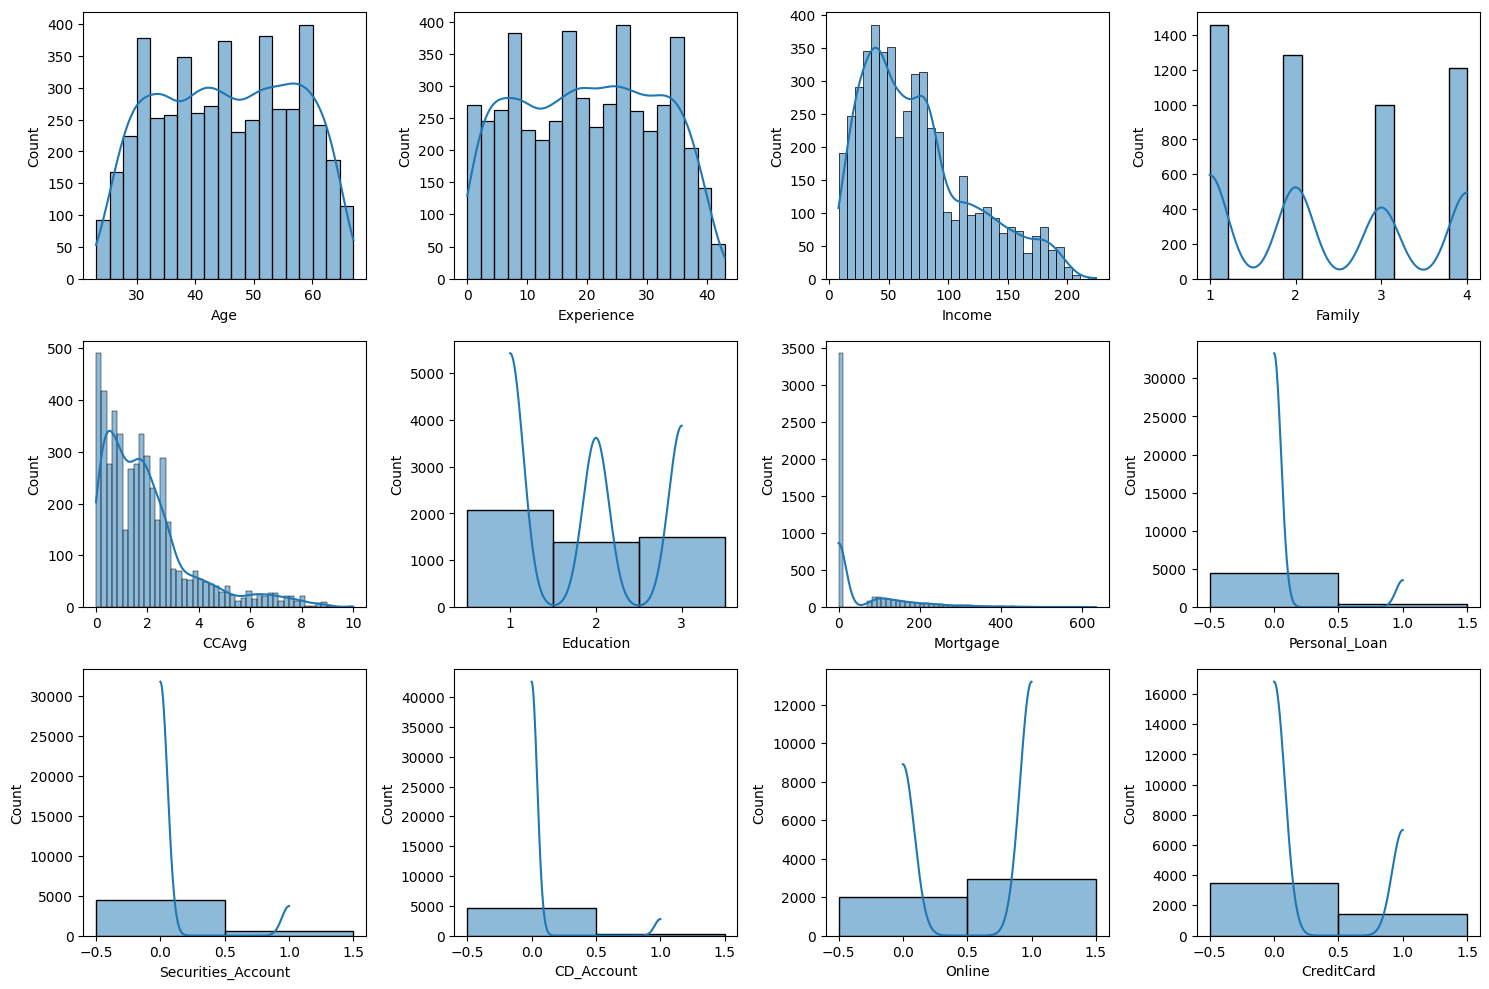

In [ ]:
# Distribution of Numerical Variables
def univariate_analysis_histplot(data_plot, columns):
  '''
    plot the histogram
    Args:
      data_plot: pandas dataframe
      columns: list of columns to plot
  '''
  # defining the figure size
  plt.figure(figsize=(15, 10))
  # defining the list of numerical features to plot
  features = cols; #data_plot.select_dtypes(include=['number']).columns.tolist()
  # creating the histograms
  for i, feature in enumerate(features):
    plt.subplot(3, 4, i+1) # assign a subplot in the main plot
    sns.histplot(data=data, x=feature, kde=True) # plot the histogram
  plt.tight_layout() # adjust the spacing between subplots
  plt.show() # display the plot

cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
univariate_analysis_histplot(data, columns= cols )

**Observation:**
* Income, CCAvg, and Mortgage have right-skewed distributions, suggesting a small number of customers with high values.
* Personal_Loan is imbalanced, with far more customers not accepting the loan.
* Securities_Account, CD_Account, Online, and CreditCard are all imbalanced, with most customers not using these services.
* Age: The distribution of age is fairly uniform across the different age groups, with no strong skew. It indicates a wide variety of customer ages in the dataset.
* Education: This feature has a very skewed distribution, with most customers having a "Graduate" education (represented by 2), and fewer customers with "Undergrad" (represented by 1) or "Advanced/Professional" education (represented by 3).

####**Correlation Heatmap:** Checking the correlation between numerical variables using a heatmap.

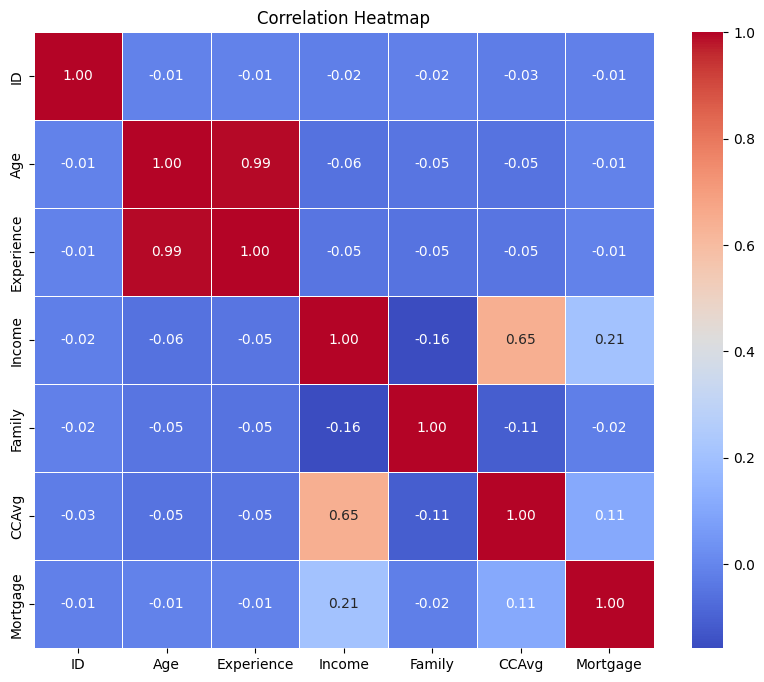

In [ ]:
def plot_correlation_heatmap(data):
  '''
    plot the correlation heatmap
    Args:
      data: pandas dataframe
  '''

  numeric_columns = data.select_dtypes(include=['number']).columns.tolist()
  # Generate the correlation matrix
  corr_matrix = data[numeric_columns].corr()

  # Plot a heatmap of the correlation matrix
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
  plt.title("Correlation Heatmap")
  plt.show()

plot_correlation_heatmap(data)


**Observation:**
* Income has the highest correlation (0.50) with Personal_Loan, which indicates that customers with higher incomes are more likely to accept the personal loan. This is an important feature to consider when building the model.

* Credit card spending (CCAvg) also shows a significant positive correlation with the likelihood of accepting a personal loan. Customers who spend more on their credit cards tend to be more likely to accept a loan.

* Customers who have a CD Account (type of savings account) with the bank are also more likely to accept the loan, though the correlation is not as strong as with Income or CCAvg.

* Customers with a mortgage are slightly more likely to accept a loan. However, the correlation is weak, suggesting that mortgage alone may not be a strong predictor for loan acceptance.

* Education level also has a positive correlation with loan acceptance, though it is weak. Higher education levels might be slightly associated with a higher likelihood of accepting the loan.

* Other features like Securities_Account, Online, CreditCard, ZIPCode, Experience, and Age have very weak or negligible correlations with Personal_Loan, indicating they may not be particularly useful for prediction.

* Based on the above heatmap, the key variables that should be considered for predicting Personal_Loan are:

  *   Most important predictors: Income, CCAvg, Mortgage and CD Account. Since CCAvg is used here so considering the CreditCard is a wise idea.
  
  *   Weak predictors: Education, Securities_Account.
  
  *   Less useful predictors: Age, Experience, ZIPCode, Family and Online (based on correlation alone).



####**Target Variable Distribution:** To check how balanced the target variable (Personal_Loan) is. This will give us an idea of whether we need to handle class imbalance.

####**Categorical Variable Analysis:** Visualize the distribution of categorical columns - Education, Securities_Account, CD_Account, Online, and CreditCard

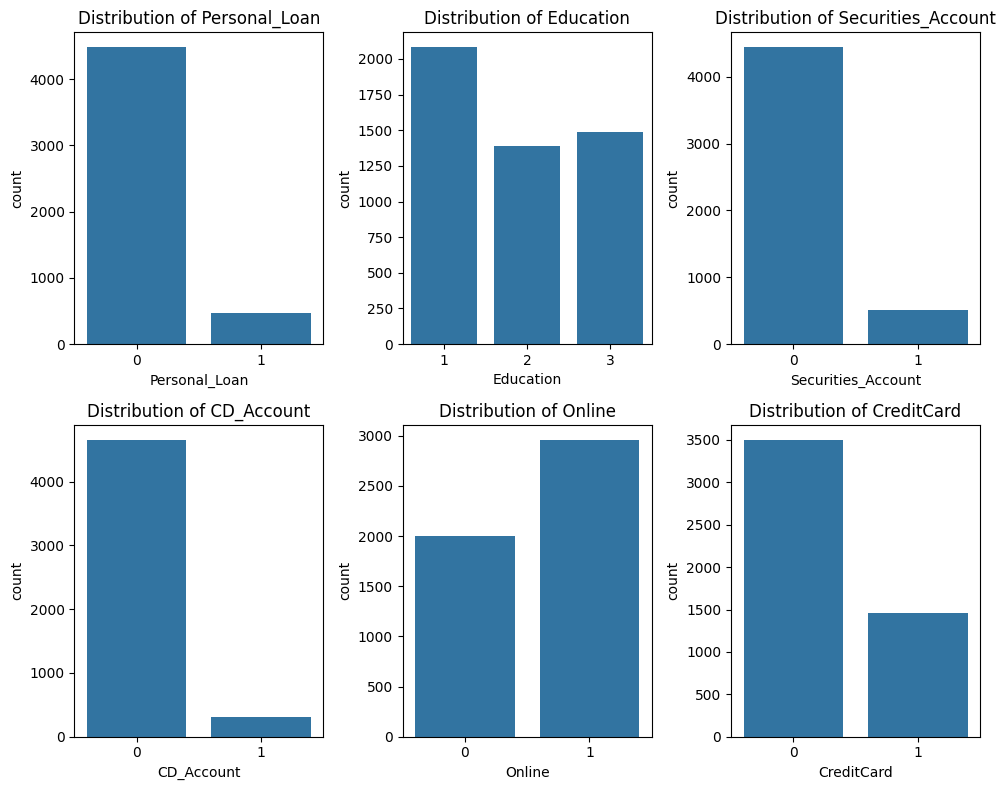

In [ ]:
def plot_categorical_distribution(data_plot):
  '''
    plot the Target Variable & categorical distribution
    Args:
      data_plot: pandas dataframe
  '''

  # Plot categorical variables' distributions
  target_categorical_cols = ['Personal_Loan', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
  plt.figure(figsize=(10, 8))

  for i, col in enumerate(target_categorical_cols, 1):
      plt.subplot(2, 3, i)
      sns.countplot(x=col, data=data_plot)
      plt.title(f'Distribution of {col}')

  plt.tight_layout()
  plt.show()

plot_categorical_distribution(data)

**Observation:**

* The distribution of the target variable Personal_Loan shows a significant imbalance. The majority of customers have a value of 0 (indicating they did not accept the loan), while only a small proportion have a value of 1 (indicating they accepted the loan).
* Securities_Account and CD_Account are highly skewed, with very few customers having these accounts, indicating that these features may not be significant for predicting Personal_Loan.
* Education is more evenly distributed but still shows that most customers are graduates.
* Online banking is popular, with more customers using online services than not.
* CreditCard usage is common among some customers, but not the majority.


**Imbalance Check:** The chart indicates an imbalanced dataset, where the target variable is dominated by one class (Class 0).
* Class 0 (did not accept the loan): Much higher count.
* Class 1 (accepted the loan): Significantly lower count.

**Best Approach for the Project:**
* Train the model with class weights to adjust for the imbalance.
* Evaluate using alternative metrics (Precision, Recall, F1-Score, and AUC-ROC).


####**Bivariate Analysis**

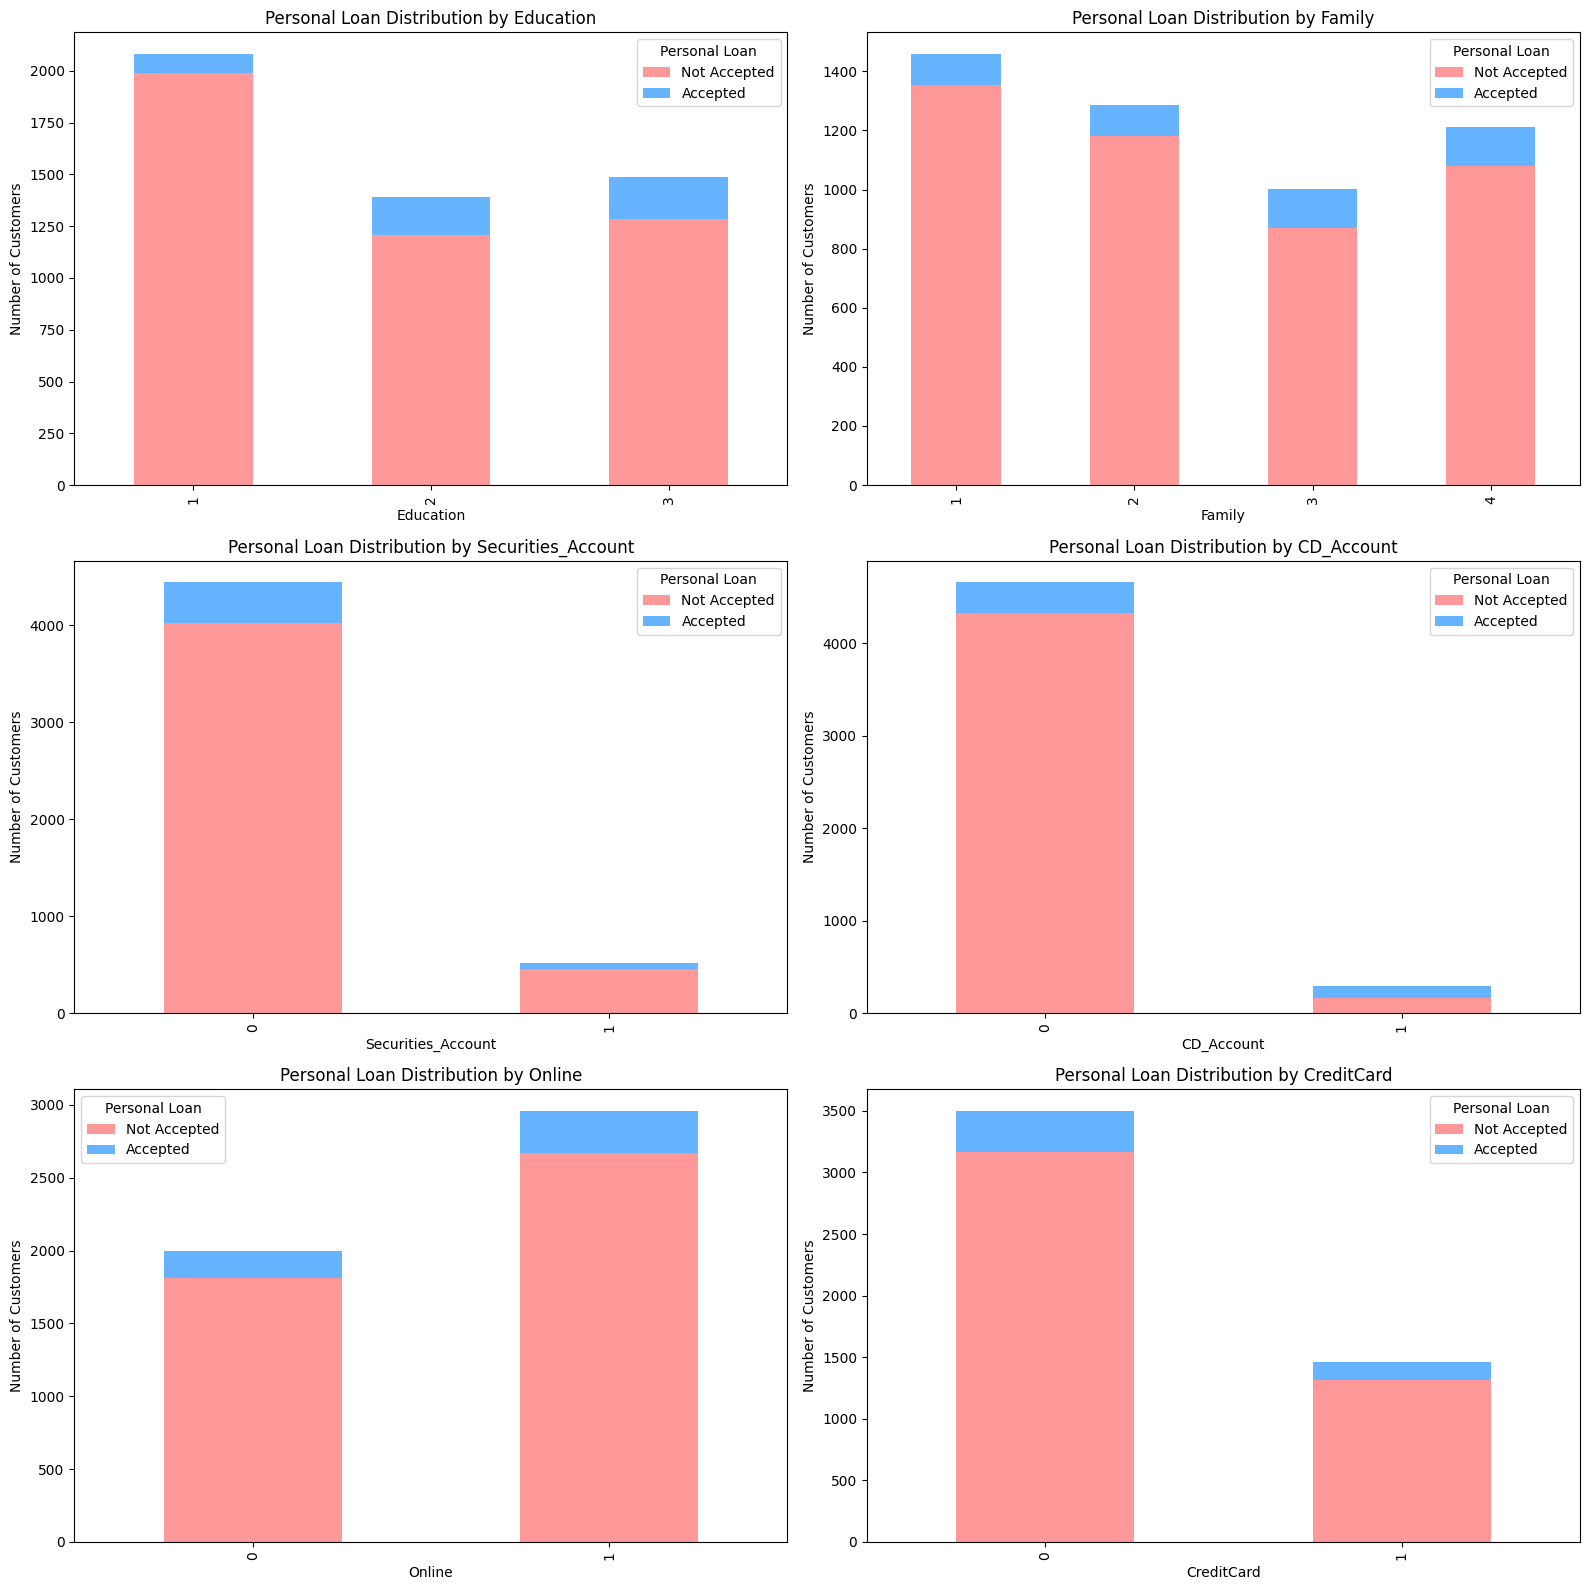

In [ ]:
def plot_bivariate_analysis(data_plot):
    '''
      plot the bivariate analysis
      Args:
        data_plot: pandas dataframe
    '''

    # Create a figure to hold all the subplots
    fig, axes = plt.subplots(3, 2, figsize=(16, 16))

    # Define the feature list for which to create stacked bar plots
    features = ['Education', 'Family', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

    # Loop through each feature and create a stacked bar plot
    for i, feature in enumerate(features):
        ax = axes[i // 2, i % 2]  # Get the appropriate axis (4x2 grid)

        # Calculate the counts of Personal_Loan for each category of the feature
        crosstab = pd.crosstab(data_plot[feature], data_plot['Personal_Loan'])

        # Plot stacked bar chart
        crosstab.plot(kind='bar', stacked=True, ax=ax, color=['#ff9999','#66b3ff'], width=0.5)

        # Set titles and labels
        ax.set_title(f'Personal Loan Distribution by {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Number of Customers')

        # Show the legend
        ax.legend(title="Personal Loan", labels=["Not Accepted", "Accepted"])

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

plot_bivariate_analysis(data)

**Observation:**

* **Education:** Customers with higher education levels (Graduate and Advanced/Professional) tend to accept personal loans more than undergraduates.

* **Family:** Larger families seem to have a higher acceptance of personal loans compared to smaller families, but the trend isn't very strong.

* **Securities Account:** Customers with a Securities_Account (denoted as 1) have a significantly higher acceptance rate for personal loans compared to those without one (denoted as 0).

* **CD Account:** A very small percentage of customers with a CD Account accepted the personal loan, while the vast majority of loan acceptances are from customers without a CD Account.

* **Online:** Customers who use Online banking services tend to accept personal loans more than those who do not.

* **Credit Card:** A smaller number of customers who hold a credit card have accepted the personal loan, compared to those who did not accept the loan. A larger proportion of customers who do not hold a credit card accepted the personal loan.


***Insight on Target Strategy:***
* The bank might consider targeting non-credit card holders for personal loan offers, as this group has a higher rate of acceptance.

* Similarly, the bank might consider targeting non-CD holders, non-Secuities Account holders for personal loan offers, as this group has a higher rate of acceptance.

* These observations suggest that certain customer attributes, such as having a securities account or using online banking, are strongly associated with the likelihood of accepting a personal loan.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

#### **Outlier Detection:** Check for outliers in key numerical features/variables (Age, Income, CCAvg and Mortgage) using boxplots

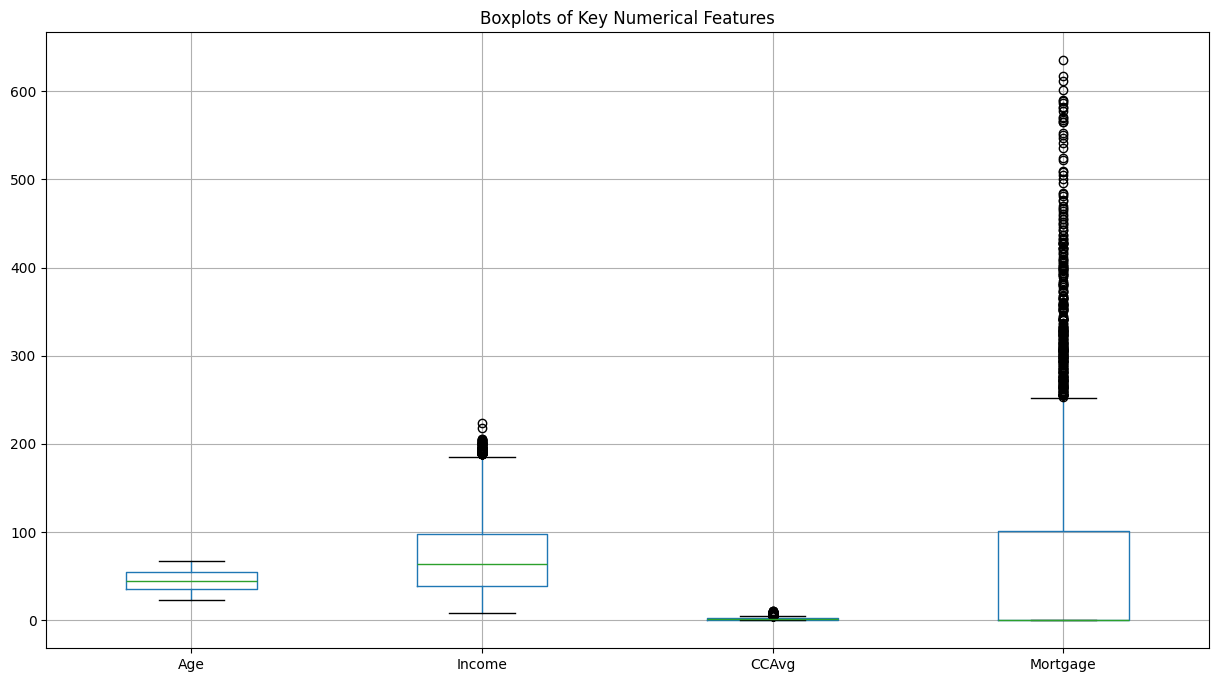

In [ ]:
def plot_boxplots(data_plot):
  '''
    plot the boxplots
    Args:
      data_plot: pandas dataframe
  '''
  # Plot boxplots for numerical features to detect outliers
  plt.figure(figsize=(15, 8))
  data_plot[['Age', 'Income', 'CCAvg', 'Mortgage', 'Education', 'CreditCard']].boxplot()
  plt.title("Boxplots of Key Numerical Features")
  plt.show()

plot_boxplots(data)

In [ ]:
# Select only numeric columns
numeric_columns_for_outliers = list(data.select_dtypes(include=['float64', 'int64']).columns)
numeric_columns_for_outliers.remove('ID')  # Remove 'ID' column from the list as this is a unique identifier

# Function to find outliers using IQR method
def find_outliers(df, numeric_columns):
    outliers = {}
    outliers_percentage = {}
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # Store outliers and percentage
        outliers[col] = outliers_in_col.index.tolist()  # Save outlier indices for each column
        outliers_percentage[col] = (len(outliers_in_col) / len(df)) * 100  # Calculate percentage of outliers

    return outliers, outliers_percentage

# Find outliers and calculate percentage
outliers, outliers_percentage = find_outliers(data, numeric_columns_for_outliers)

# Display outliers and their percentage for each column
for column, indices in outliers.items():
    #print(f"Outliers in {column}: {indices}")
    print(f"Percentage of outliers in {column}: {outliers_percentage[column]:.2f}%")

Percentage of outliers in Age: 0.00%
Percentage of outliers in Experience: 0.00%
Percentage of outliers in Income: 1.94%
Percentage of outliers in Family: 0.00%
Percentage of outliers in CCAvg: 6.45%
Percentage of outliers in Mortgage: 5.83%


**Observation:**

* The highest percentage of outliers is seen in CCAvg and Mortgage, which may require further attention or cleaning.

* Income also has a small percentage of outliers, which could be indicative of high-income or low-income customers.

* Most other columns, including Age, Experience, and Family, show no significant outliers, suggesting consistency in those features.

In [ ]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data_plot, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data_plot[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data_plot[data_plot[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data_plot[data_plot[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data_plot, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data_plot,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**Let's analyze the relation between *Mortgage* and *Personal_Loan*.**

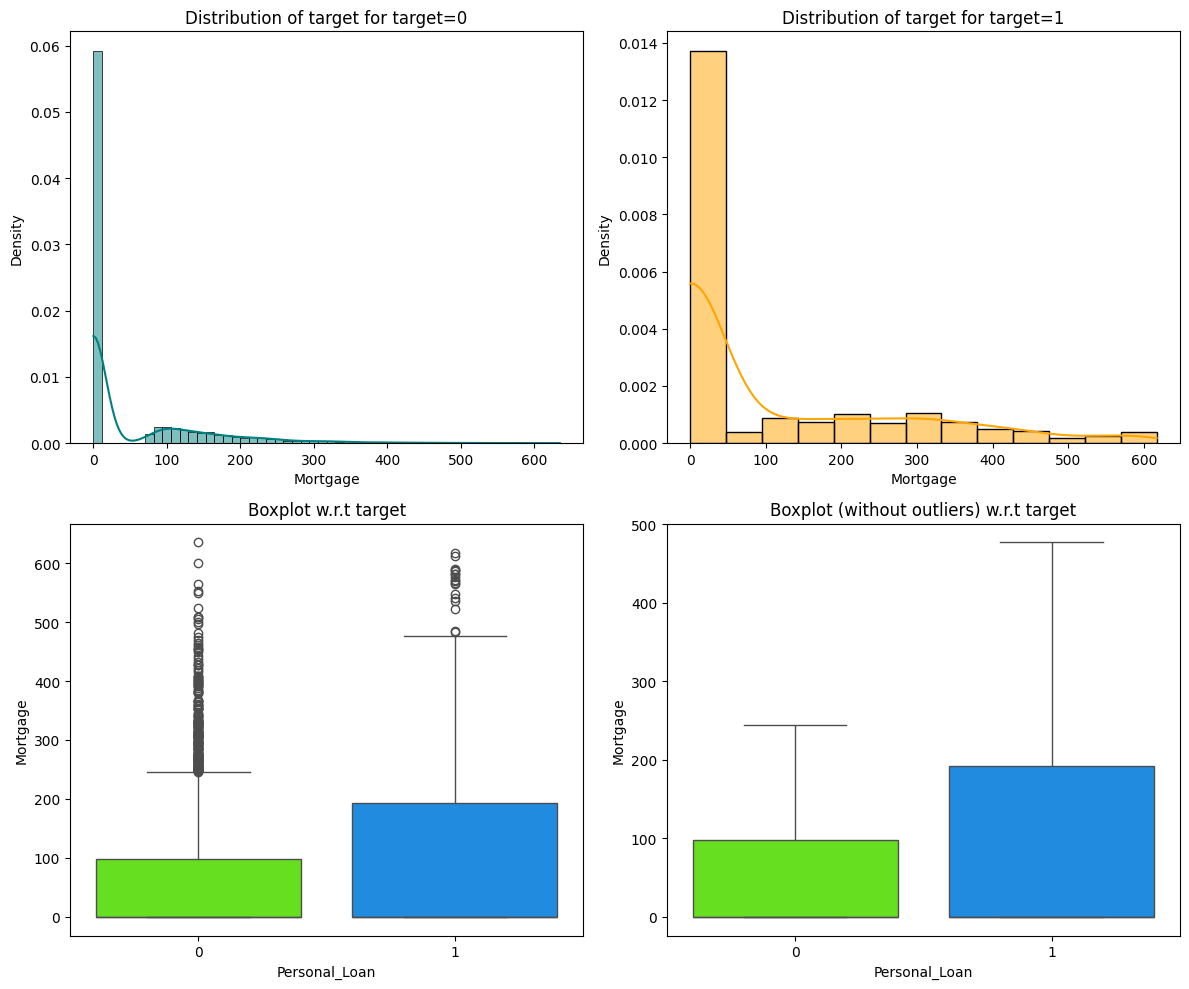

In [ ]:
distribution_plot_wrt_target(data, "Mortgage", "Personal_Loan")

**Observation:** The mortgage feature seems to have a mild positive relationship with the likelihood of accepting the loan. Customers with mortgages, especially those in the lower to mid-range, are more likely to accept the personal loan. Handling outliers in the mortgage feature could help further improve the model's performance. However, we will not treat them as they are proper values.

**Let's analyze the relation between *Income* and *Personal_Loan*.**

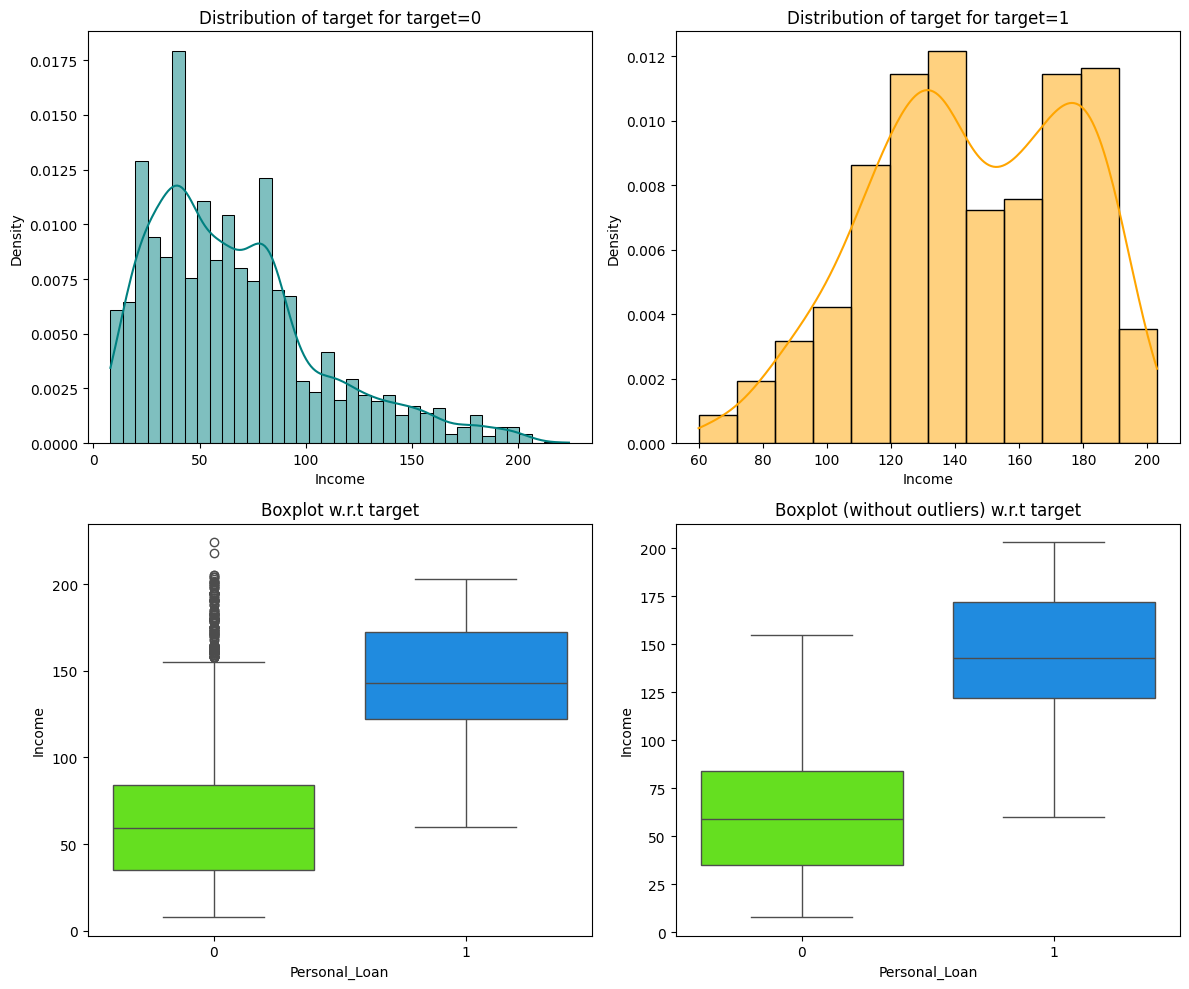

In [ ]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

**Observation:** Income is a significant factor in predicting Personal_Loan acceptance. Customers with higher to moderate income levels are more likely to accept the loan, suggesting that the bank may target individuals with these income levels for future loan campaigns.

**Let's analyze the relation between *CCAvg (Average spending on credit cards)* and *Personal_Loan*.**

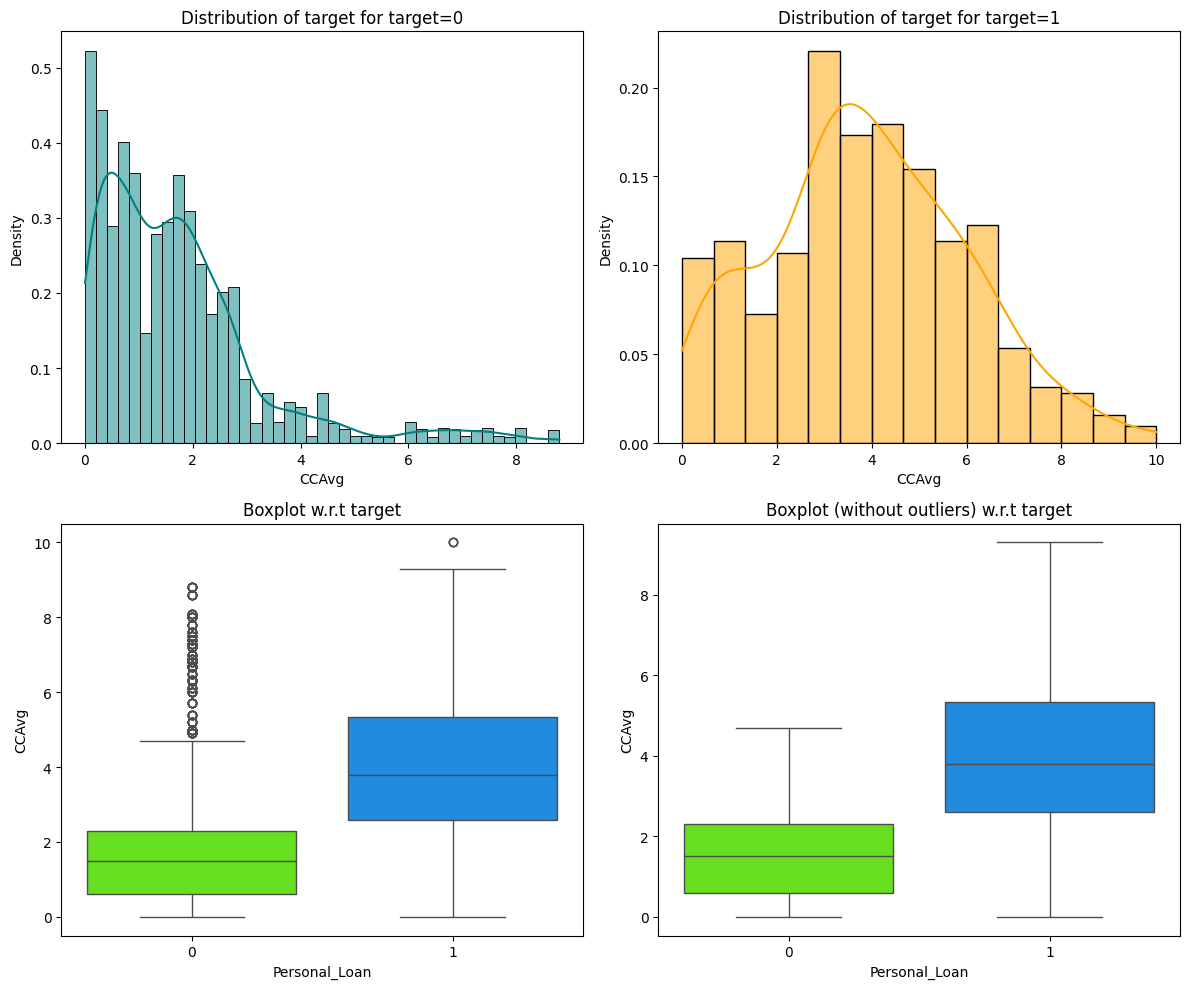

In [ ]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

**Observation:** CCAvg appears to be a significant factor in determining whether a customer will accept a personal loan. Customers with moderate to high credit card spending are more likely to accept the loan, and targeting this group might be effective for future campaigns.

**Let's analyze the relation between *Age* and *Personal_Loan*.**

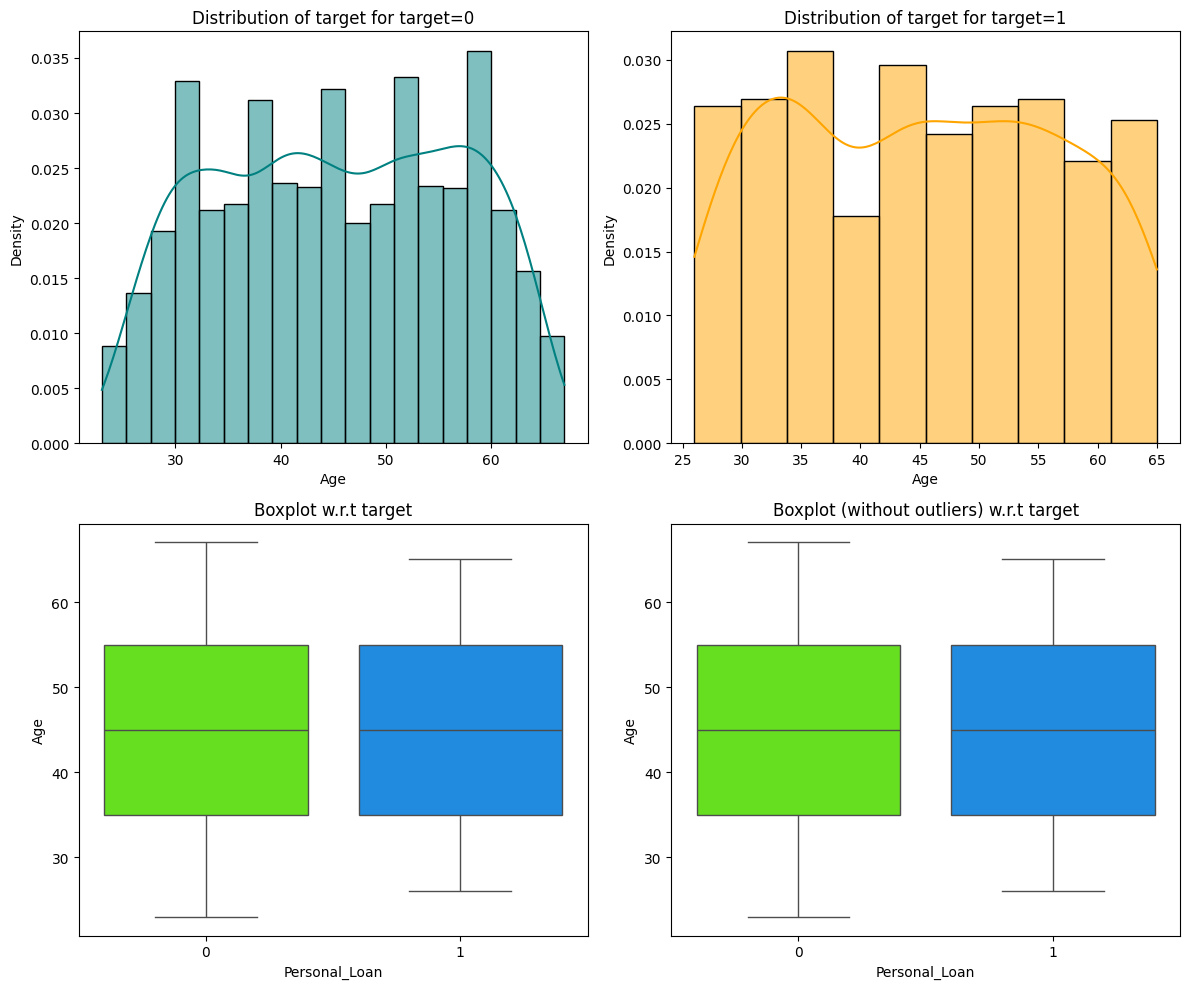

In [ ]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

**Observation:** Age is a weak predictor for Personal_Loan acceptance, but customers in their 30s to 50s seem to have a slightly higher probability of accepting the loan.

**Let's analyze the relation between *Education* and *Personal_Loan*.**

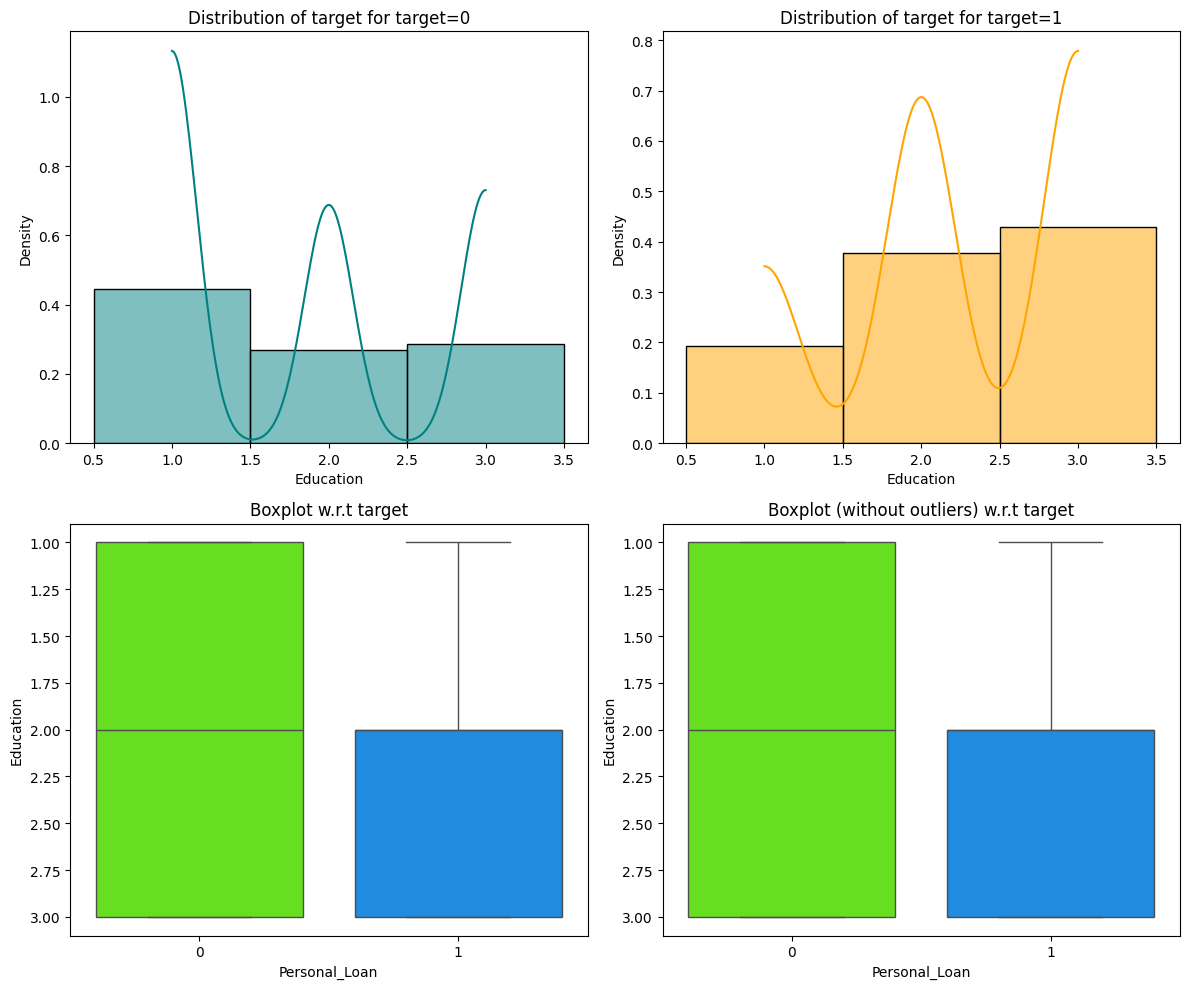

In [ ]:
distribution_plot_wrt_target(data, "Education", "Personal_Loan")

**Observation:**
* Customers with higher education (Graduate or Advanced/Professional) are more likely to accept the personal loan. The median education level for loan acceptors is higher compared to non-acceptors.
* The majority of customers who did not accept the loan have an undergraduate education.
* While Education does show a trend, it is not as strongly predictive as other features like Income or CCAvg. However, it still provides valuable insight into the likelihood of loan acceptance

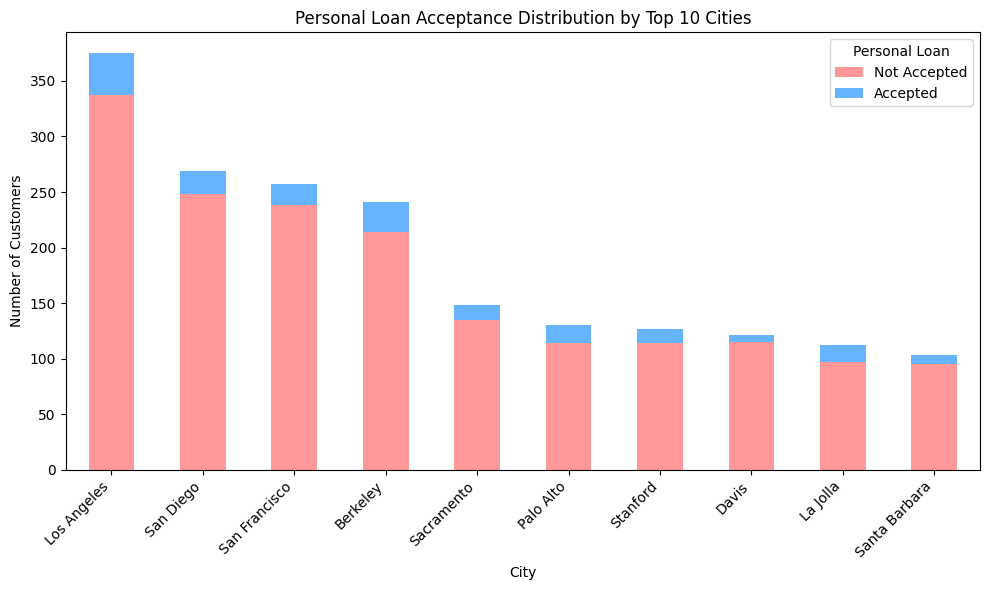

In [ ]:
def plot_top_cities_with_higher_loan_acceptance(data_plot, top_n=10):
    '''
      Plot the top N cities with the most customers.
    Args:
      data_plot: pandas dataframe
      top_n: number of top cities to plot
    '''

    # Assuming ZIP Code can represent the city (if a City column exists, use that)
    # First, count the number of customers in each ZIP Code with Personal Loan acceptance
    city_crosstab = pd.crosstab(data['City'], data['Personal_Loan'])

    # Sort the ZIP Codes by the total number of customers (top 10 ZIP Codes)
    top_10_city = city_crosstab.sum(axis=1).sort_values(ascending=False).head(10).index

    # Filter data to only include top 10 ZIP Codes
    top_10_city_data = city_crosstab.loc[top_10_city]

    # Create a stacked bar plot
    top_10_city_data.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], figsize=(10, 6))

    # Add titles and labels
    plt.title('Personal Loan Acceptance Distribution by Top 10 Cities')
    plt.xlabel('City')
    plt.ylabel('Number of Customers')
    plt.legend(title='Personal Loan', labels=['Not Accepted', 'Accepted'])
    plt.xticks(rotation=45, ha='right')
    # Show the plot
    plt.tight_layout()
    plt.show()

plot_top_cities_with_higher_loan_acceptance(data)

**Observations:**

* Los Angeles has the highest customer base and loan acceptance, though a significant portion still doesn't accept loans.

* San Diego and San Francisco show good loan interest, with a balance of acceptance and non-acceptance.

* Berkeley, Sacramento, and Palo Alto have lower loan acceptance rates, indicating potential for targeted marketing.

* Davis, La Jolla, and Santa Barbara show high non-acceptance and lower customer numbers, suggesting opportunities for improvement.

**Insights:**

* Focus on larger cities like Los Angeles for higher volumes.

* Tailor campaigns for cities with higher non-acceptance (e.g., Davis, Santa Barbara) to boost conversions.

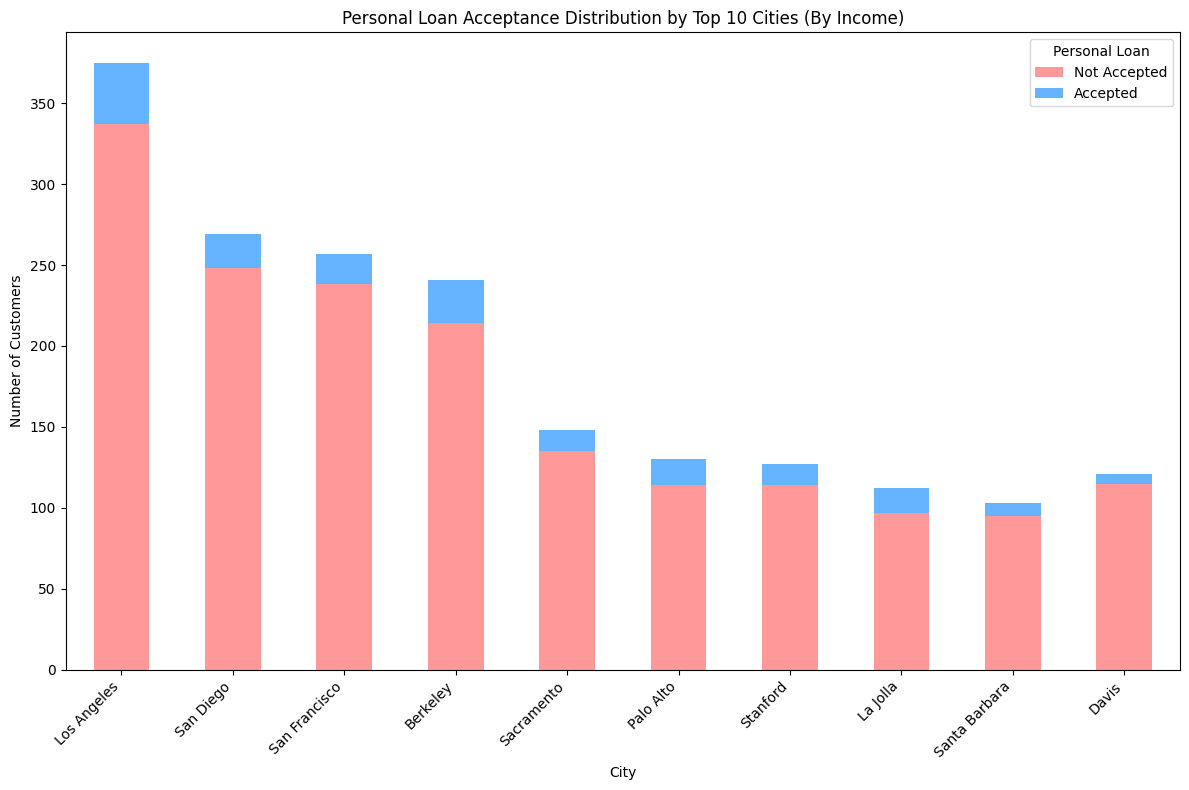

In [ ]:
def plot_top_cities_income_with_higher_loan_acceptance(data_plot, top_n=10):
    '''
    Plot the top N cities with the most customers.
    Args:
      data_plot: pandas dataframe
      top_n: number of top cities to plot

    '''

    # Group by 'ZIP Code' or 'City' (assuming ZIP Code as a proxy for City)
    # Summing up the total income for each ZIP Code/City
    city_income = data.groupby('City')['Income'].sum()

    # Sort the cities (or ZIP Codes) by total income and select the top 10
    top_10_cities_by_income = city_income.sort_values(ascending=False).head(10).index

    # Now, create a crosstab for the top 10 cities, showing Personal_Loan vs loan acceptance
    city_loan_crosstab = pd.crosstab(data[data['City'].isin(top_10_cities_by_income)]['City'],
                                    data['Personal_Loan'])

    # Create a stacked bar plot for the top 10 cities by income
    city_loan_crosstab.loc[top_10_cities_by_income].plot(kind='bar', stacked=True,
                                                          color=['#ff9999', '#66b3ff'], figsize=(12, 8))

    # Add titles and labels
    plt.title('Personal Loan Acceptance Distribution by Top 10 Cities (By Income)')
    plt.xlabel('City')
    plt.ylabel('Number of Customers')
    plt.legend(title='Personal Loan', labels=['Not Accepted', 'Accepted'])
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.tight_layout()
    plt.show()

plot_top_cities_income_with_higher_loan_acceptance(data)

**Observations:**

* Los Angeles and San Diego lead in the number of customers and show a higher acceptance rate for personal loans.

* Berkeley and San Francisco have moderate loan acceptance, while cities like Palo Alto and Stanford show a higher rate of non-acceptance.

* Davis and Santa Barbara show the lowest customer numbers, with a high proportion of non-acceptance.

**Insights:**

* Focus on Los Angeles and San Diego for maximizing loan conversions due to their high customer base.

* Targeted campaigns could be beneficial in cities with high non-acceptance like Palo Alto and Davis to increase loan uptake.

#### **Preparing data for modeling:**

In [ ]:
# Dropping the 'ID', 'Personal_Loan', and 'Experience' columns
# 'ID' is a unique identifier and should not be used for prediction.
# 'Personal_Loan' is the target variable and should not be part of the feature set.
# 'Experience' is dropped as it is perfectly correlated with 'Age' and provides redundant information.
X = data.drop(["ID", "Personal_Loan", "Experience"], axis=1)

# Defining the target variable 'y', which is the 'Personal_Loan' column
y = data["Personal_Loan"]  # Target variable: Whether the customer accepted the loan

# Convert categorical columns ('City' and 'Education') into dummy variables (one-hot encoding)
# 'drop_first=True' is used to avoid the dummy variable trap (multicollinearity).
X = pd.get_dummies(X, columns=["City", "Education"], drop_first=True)


# Feature Scaling - Apply StandardScaler to continuous numerical features
# Only scale continuous numerical features
numerical_features = ['Age', 'Income', 'CCAvg', 'Mortgage']  # Exclude 'Experience' since it's dropped

# Apply StandardScaler to those features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Convert all features in X to float type for compatibility with machine learning algorithms
X = X.astype(float)

# Splitting the data into training and test sets
# 70% of the data will be used for training and 30% for testing.
# 'random_state=1' ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


**observation:**
* Since Experience and Age are highly correlated, Experience doesn't provide much additional useful information for predicting personal loan acceptance. Age, on the other hand, can play a more important role in the prediction model because it can be a key factor in understanding a customer's likelihood to accept a loan.

* Age often correlates with other factors that might influence loan acceptance, such as:

  * **Financial stability:** Older individuals may have more stable financial backgrounds and be more likely to accept a loan.

  * **Life stages:** Certain age groups (e.g., individuals in their 30s and 40s) may be more likely to seek personal loans for big life events like buying a house, financing education, or managing debt.

In [ ]:
# Check the shapes of the resulting data
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training features shape: (3471, 254)
Test features shape: (1488, 254)
Training target shape: (3471,)
Test target shape: (1488,)


## Model Building

### Model Evaluation Criterion

In [ ]:
#User-Defined-Function
def model_evaluation_metrics_and_classification(y_test, y_pred, c_title="Classification Report", show_eval_metrics=False):
    """
    Function to evaluate the model

    y_test: true values of target variable
    y_pred: predicted values of target variable
    c_title: classification report title
    """

    # Model Evaluation
    print(f"{bold}{c_title}{reset}:\n{classification_report(y_test, y_pred)}\n")

    if show_eval_metrics:

        print("-"*100)
        print(f"{bold}Model Performance Metrics{reset}:\n")

        # Calculate and print evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)

        # creating a dataframe of metrics
        df_perf = pd.DataFrame(
            {"Accuracy": accuracy, "Recall": recall, "Precision": precision, "F1": f1, "AUC-ROC": roc_auc,},
            index=[0],
        )
    else:
        df_perf = None
    return df_perf

In [ ]:
# User-Defined-Function
def plot_confusion_matrix(y_test, y_pred, title='Confusion matrix'):
    '''
        Function to plot confusion matrix

        y_test: true values of target variable
        y_pred: predicted values of target variable
        title: title of the plot
    '''
    # Confusion Matrix for Logistic Regression
    logreg_cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(logreg_cm, annot=True, fmt="d", cmap="coolwarm", cbar=False,
                xticklabels=['No Loan', 'Loan Accepted'], yticklabels=['No Loan', 'Loan Accepted'])
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


**Model Selection Approach:**

* **Start with Logistic Regression as your baseline model.** It will give you a clear understanding of how the features relate to the loan acceptance decision.

* **Train a Decision Tree model** and evaluate if it significantly improves performance by capturing non-linear patterns that logistic regression might miss.

* **Train both models**, evaluate them using appropriate metrics, and compare their performance on the test set. This will give you concrete evidence to select the best model for your project.


### Model Building

##### **Logistic Regression Model**

In [ ]:
# Create the logistic regression model
logreg_model_1 = LogisticRegression()

# Train the model
logreg_model_1.fit(X_train, y_train)

# Predict on the test set
y_pred_1 = logreg_model_1.predict(X_test)

# Generate confusion matrix
logreg_cm = confusion_matrix(y_test, y_pred_1)

e_metrics = model_evaluation_metrics_and_classification(y_test, y_pred_1,'Logistic Regression (Baseline) Classification Report', show_eval_metrics=True)
e_metrics

Logistic Regression (Baseline) Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1339
           1       0.87      0.58      0.70       149

    accuracy                           0.95      1488
   macro avg       0.91      0.79      0.84      1488
weighted avg       0.95      0.95      0.95      1488


----------------------------------------------------------------------------------------------------
Model Performance Metrics:



,Accuracy,Recall,Precision,F1,AUC-ROC
0,0.949597,0.583893,0.87,0.698795,0.787092


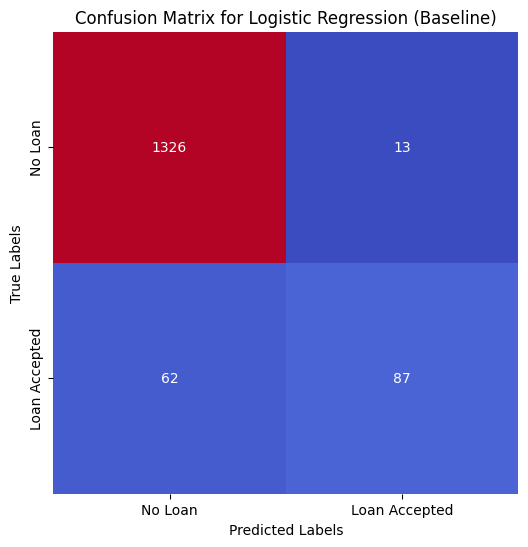

In [ ]:
plot_confusion_matrix(y_test, y_pred_1, "Confusion Matrix for Logistic Regression (Baseline)")

**Key Observations:**

* Accuracy: High accuracy, indicating the model is generally correct in its predictions.

* Recall: The model misses some true positives (loan acceptances).

* Precision: High precision, meaning predictions of loan acceptance are mostly correct.

* F1-Score: A good balance between precision and recall.

* AUC-ROC: Strong ability to distinguish between loan acceptances and rejections.

**Takeaways:**

The model is strong overall but could improve recall to capture more loan acceptances. Recall measures how many of the actual loan acceptances were correctly identified by the model. A recall is decent, but it could be improved. Recall being lower than accuracy suggests that the model might be missing some true positives (loan acceptances).

**Next Step**
Improving recall (to capture more true loan acceptances) consider adjusting the decision threshold. To improve the decision threshold in Logistic Regression, you can adjust the threshold used to classify predictions as either 0 (no loan acceptance) or 1 (loan acceptance).

*By default, Logistic Regression uses a threshold of 0.5:*

* If the predicted probability is greater than 0.5, it classifies the instance as class 1 (loan acceptance).

* If the probability is less than 0.5, it classifies the instance as class 0 (no loan acceptance).

In [ ]:
# Adjusting the decision threshold - First tuning for Logistic Regression (Baseline)
# Predict probabilities on the test set (get probabilities for class 1, loan acceptance)
y_pred_prob = logreg_model_1.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (loan acceptance)

# Set a new threshold (e.g., 0.3, 0.7) - adjusted
threshold = 0.3
y_pred_adj = (y_pred_prob >= threshold).astype(int)

e_metrics_2 = model_evaluation_metrics_and_classification(y_test, y_pred_adj,'Logistic Regression (adjusted threshold) Classification Report', show_eval_metrics=True)
#print(f'{bold}Evaluation metrics with the new threshold{reset}')
e_metrics_2


Logistic Regression (adjusted threshold) Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1339
           1       0.76      0.73      0.75       149

    accuracy                           0.95      1488
   macro avg       0.87      0.85      0.86      1488
weighted avg       0.95      0.95      0.95      1488


----------------------------------------------------------------------------------------------------
Model Performance Metrics:



,Accuracy,Recall,Precision,F1,AUC-ROC
0,0.950269,0.731544,0.762238,0.746575,0.853076


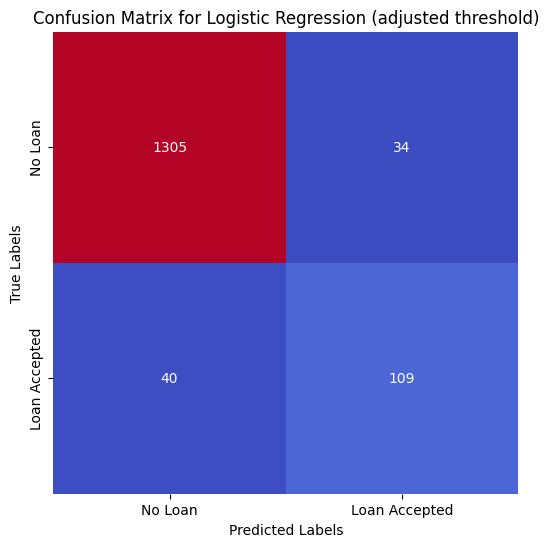

In [ ]:
plot_confusion_matrix(y_test, y_pred_adj, "Confusion Matrix for Logistic Regression (adjusted threshold)")

**Observation:**  Model Evaluation After Threshold Adjustment:

* Accuracy: 95.03% — There is a slight increase in overall accuracy, meaning the model is now correctly classifying a few more instances.

* Recall: 73.15% — There is a significant improvement in recall, meaning the model is now capturing many more actual loan acceptances (true positives).

* Precision: 76.23% — A slight decrease in precision as a result of lowering the threshold, but this is expected since the model is now classifying more customers as loan acceptors.

* F1-Score: 74.68% — Slight improvement in F1-Score, reflecting a better balance between precision and recall.

* AUC-ROC: 85.31% — The model's ability to distinguish between classes (loan acceptance vs rejection) has slightly improved.

##### **Decision Trees Model**

In [ ]:
# Create/Initialize and train the baseline Decision Tree model
dt_model_1 = DecisionTreeClassifier(random_state=1)
dt_model_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
#Evaluate the Baseline Model

# Make predictions on the test set
y_pred_baseline = dt_model_1.predict(X_test)

# Evaluate the baseline model's performance
print(f"{bold}Decision Tree (Baseline) Model Accuracy:{reset}: {accuracy_score(y_test, y_pred_baseline)}")

e_metrics_3 = model_evaluation_metrics_and_classification(y_test, y_pred_baseline,'Decision Tree (Baseline) Model Classification Report', True)
#print(f'{bold}Decision Tree (Baseline) Model Evaluation Metrics{reset}')
e_metrics_3


Decision Tree (Baseline) Model Accuracy:: 0.9717741935483871
Decision Tree (Baseline) Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1339
           1       0.85      0.88      0.86       149

    accuracy                           0.97      1488
   macro avg       0.92      0.93      0.92      1488
weighted avg       0.97      0.97      0.97      1488


----------------------------------------------------------------------------------------------------
Model Performance Metrics:



,Accuracy,Recall,Precision,F1,AUC-ROC
0,0.971774,0.879195,0.845161,0.861842,0.930635


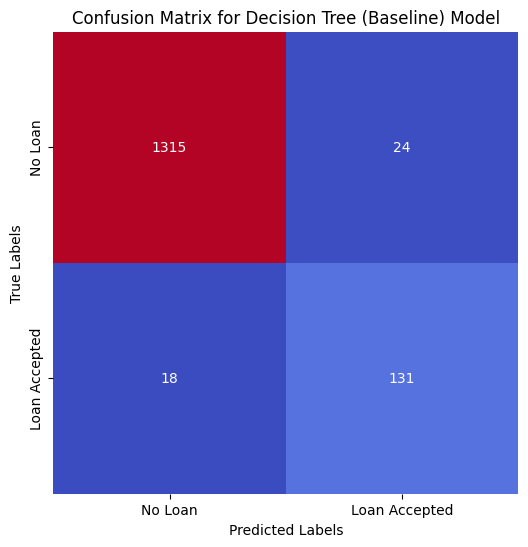

In [ ]:
plot_confusion_matrix(y_test, y_pred_baseline, "Confusion Matrix for Decision Tree (Baseline) Model")

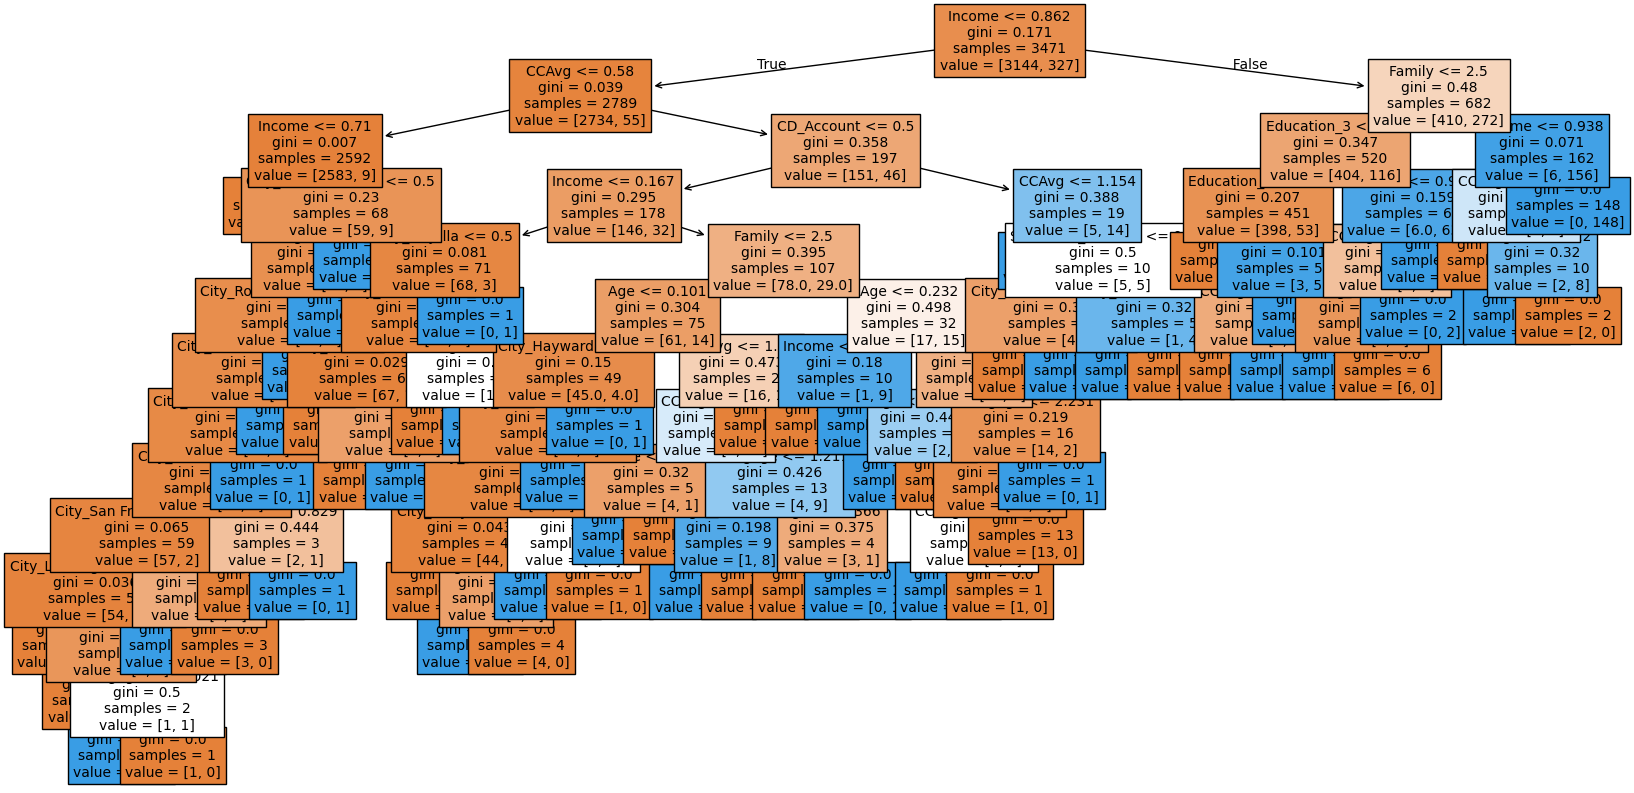

In [ ]:
#Visualize the Baseline Decision Tree
# Plot the baseline decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model_1, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

**Observation:** It seems like the Decision Tree model is overfitting, which is a common issue with Decision Trees, especially if the tree is too deep or not pruned.

## Model Performance Improvement

Note: We are tunning both the models in this section
 * Logistic Regression Model
 * Decission Tree Model


##### **Logistic Regression Model Performance Tuning**

In [ ]:
# Create the Logistic Regression model
logreg_model_2 = LogisticRegression()

# Define the hyperparameters grid to search
#param_grid = {
#    'C': [0.1, 1, 10, 100],                # Regularization strength
#    'solver': ['liblinear', 'lbfgs'],       # Optimization solvers
#    'penalty': ['l2', 'l1'],                # Regularization type
#    'max_iter': [100, 200, 300]             # Max number of iterations for optimization
#}

param_grid = {
    'C': np.logspace(-3, 2, 10),  # Reduced granularity
    'solver': ['liblinear', 'lbfgs'],  # Focus on efficient solvers
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'max_iter': [100, 200, 500, 1000],
    'tol': [1e-4, 1e-5],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Perform Grid Search with cross-validation (cv=5 for 5-fold cross-validation)
grid_search = GridSearchCV(estimator=logreg_model_2, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the GridSearchCV model on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print(f"{bold}Best Hyperparameters:{reset} {grid_search.best_params_}")

# Use the best model found by GridSearchCV to predict on the test set
best_logreg_model = grid_search.best_estimator_

# Predict using the best model
y_pred_2 = best_logreg_model.predict(X_test)

e_metrics_4 = model_evaluation_metrics_and_classification(y_test, y_pred_2,'Logistic Regression (Hyperparameter Tuned) Classification Report', show_eval_metrics=True)
e_metrics_4

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
Best Hyperparameters: {'C': np.float64(2.1544346900318843), 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}
Logistic Regression (Hyperparameter Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1339
           1       0.88      0.58      0.70       149

    accuracy                           0.95      1488
   macro avg       0.92      0.78      0.83      1488
weighted avg       0.95      0.95      0.94      1488


----------------------------------------------------------------------------------------------------
Model Performance Metrics:



,Accuracy,Recall,Precision,F1,AUC-ROC
0,0.949597,0.577181,0.877551,0.696356,0.78411


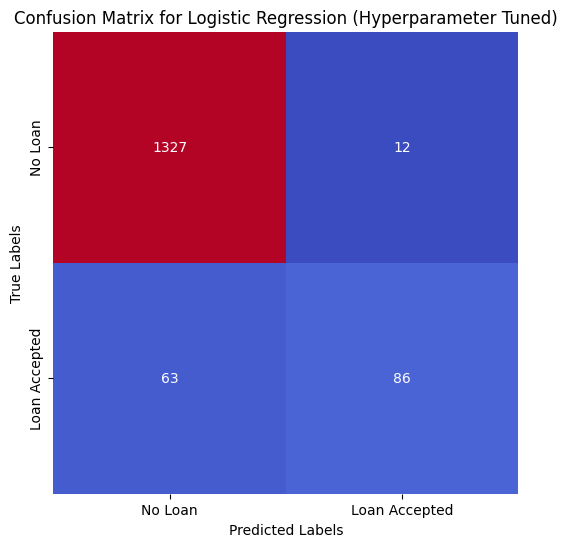

In [ ]:
plot_confusion_matrix(y_test, y_pred_2, "Confusion Matrix for Logistic Regression (Hyperparameter Tuned)")

**Observation:** The hyperparameter tuning didn’t provide a significant improvement in this case, but the model is performing fairly well. ***Further exploration of other regularization parameters or even switching to more Decision Trees model might be worth considering for improved performance.***

##### **Decission Trees Model Performance Tuning**

In [ ]:
# Initialize the Decision Tree with class weight adjustment for imbalance
dt_model_2 = DecisionTreeClassifier(random_state=1, class_weight='balanced')

In [ ]:
# Hyperparameter grid for tuning  - Pruning
param_grid = {
    'max_depth': [5, 10, 15, 20, None], #Pre-pruning
    'min_samples_split': [2, 5, 10],    #Pre-pruning
    'min_samples_leaf': [1, 2, 4],      #Pre-pruning
    'ccp_alpha': [0.0, 0.01, 0.05]      # Post-pruning: cost complexity prunning
}

# Use GridSearchCV to find the best hyperparameters
grid_search_2 = GridSearchCV(estimator=dt_model_2, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_2.fit(X_train, y_train)

# Get the best parameters
best_params_2 = grid_search_2.best_params_
print(f"{bold}Best Hyperparameters:{reset}", best_params_2)

# Train the model with the best hyperparameters
best_dt_model_2 = grid_search_2.best_estimator_


Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best Hyperparameters: {'ccp_alpha': 0.0, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
#Evaluate the Model

# Make predictions on the test set
y_pred_3 = best_dt_model_2.predict(X_test)

# Evaluate the performance using classification metrics
print(f"{bold}Decision Tree (Hyperparameter Tuning and Pruning) - Tuning Accuracy:{reset}", accuracy_score(y_test, y_pred_3))

e_metrics_5 = model_evaluation_metrics_and_classification(y_test, y_pred_3,'Decission Tree (Hyperparameter Tuning and Pruning) Classification Report', True)
e_metrics_5
#print("First Tuning Classification Report:\n", classification_report(y_test, y_pred_3))

Decision Tree (Hyperparameter Tuning and Pruning) - Tuning Accuracy: 0.9771505376344086
Decission Tree (Hyperparameter Tuning and Pruning) Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1339
           1       0.88      0.90      0.89       149

    accuracy                           0.98      1488
   macro avg       0.93      0.94      0.94      1488
weighted avg       0.98      0.98      0.98      1488


----------------------------------------------------------------------------------------------------
Model Performance Metrics:



,Accuracy,Recall,Precision,F1,AUC-ROC
0,0.977151,0.899329,0.875817,0.887417,0.94257


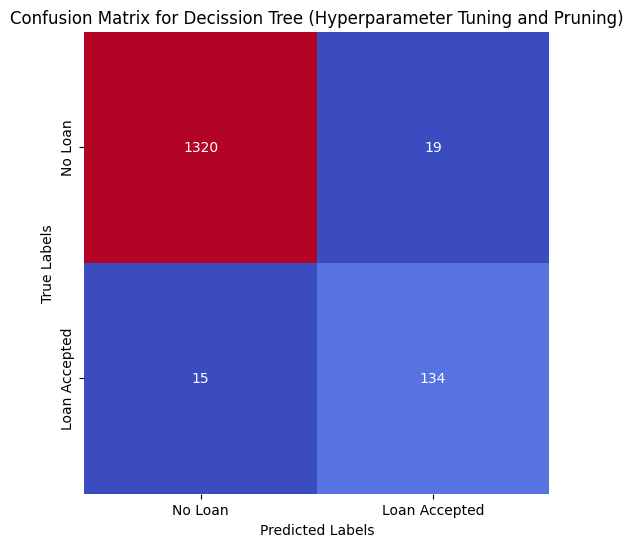

In [ ]:
# Confusion Matrix for Decision Tree
plot_confusion_matrix(y_test, y_pred_3, "Confusion Matrix for Decission Tree (Hyperparameter Tuning and Pruning)")

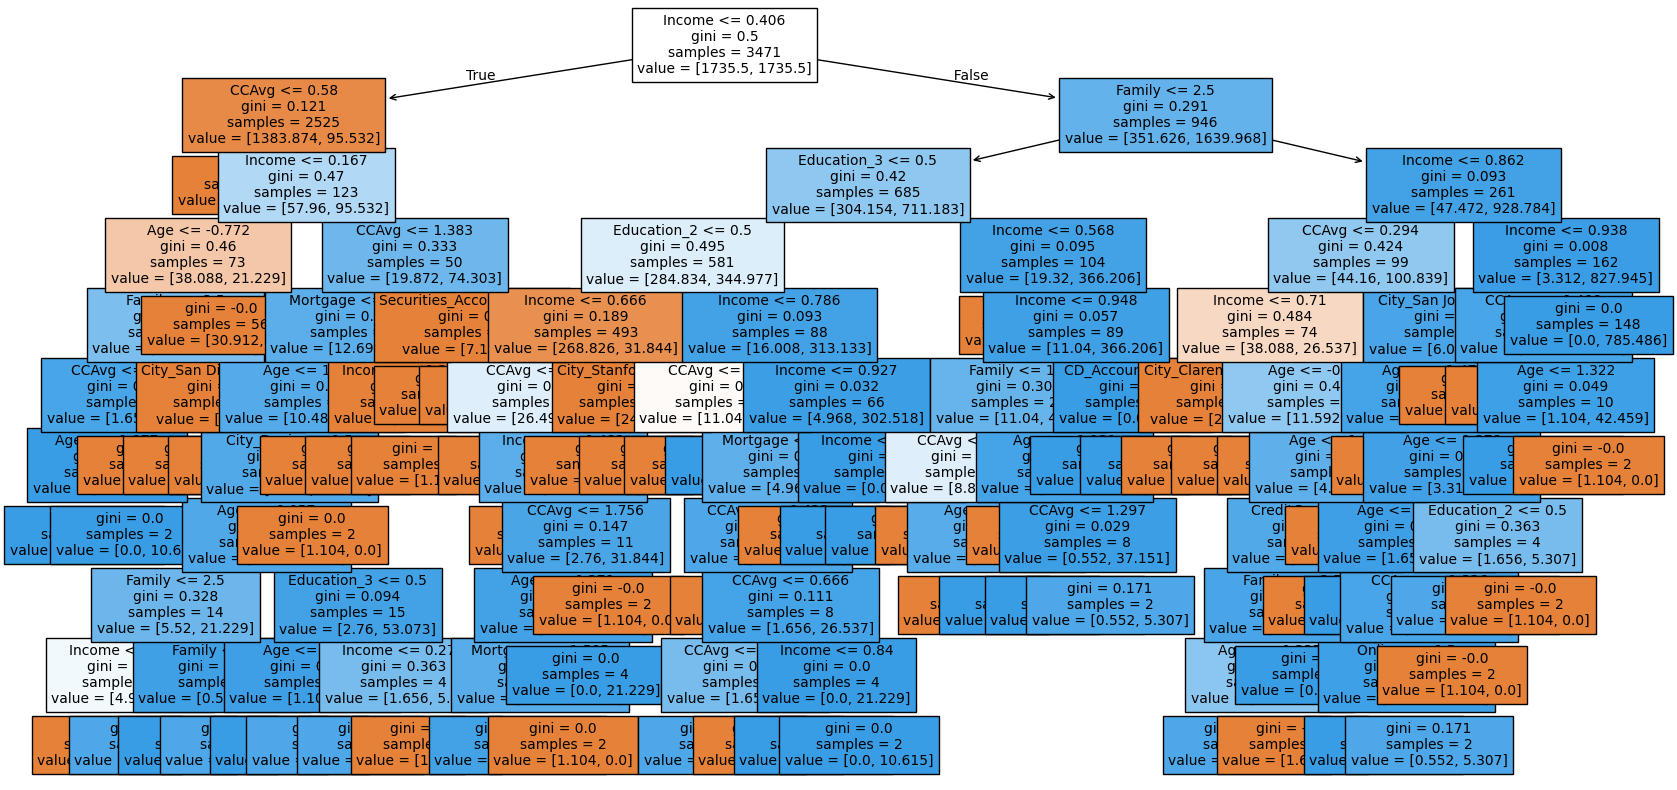

In [ ]:
#Visualize the Decision Tree (after tuning)
# Plot the tuned decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model_2, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_dt_model_2, feature_names=X.columns, show_weights=True))

|--- Income <= 0.41
|   |--- CCAvg <= 0.58
|   |   |--- weights: [1325.91, 0.00] class: 0
|   |--- CCAvg >  0.58
|   |   |--- Income <= 0.17
|   |   |   |--- Age <= -0.77
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- CCAvg <= 0.90
|   |   |   |   |   |   |--- Age <= -1.08
|   |   |   |   |   |   |   |--- weights: [0.00, 10.61] class: 1
|   |   |   |   |   |   |--- Age >  -1.08
|   |   |   |   |   |   |   |--- weights: [0.00, 10.61] class: 1
|   |   |   |   |   |--- CCAvg >  0.90
|   |   |   |   |   |   |--- weights: [1.66, 0.00] class: 0
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- City_San Diego <= 0.50
|   |   |   |   |   |   |--- weights: [4.42, 0.00] class: 0
|   |   |   |   |   |--- City_San Diego >  0.50
|   |   |   |   |   |   |--- weights: [1.10, 0.00] class: 0
|   |   |   |--- Age >  -0.77
|   |   |   |   |--- weights: [30.91, 0.00] class: 0
|   |   |--- Income >  0.17
|   |   |   |--- CCAvg <= 1.38
|   |   |   |   |--- Mortgage <= 1.79
|   |   |

**Key Observations:**

* Income is a significant feature, with the decision tree splitting multiple times based on different income thresholds, including values like 0.41, 0.67, 0.79, and others.

* Customers with higher income (> 0.41) are more likely to not accept the loan, especially when combined with other features like Family size and CCAvg.

* CCAvg (credit card average spending) is another important feature that, when high, tends to lead to non-loan acceptance.

* For lower-income customers (<= 0.41), the tree continues to split based on CCAvg, with further splits related to Age, Family size, and City.

* The Age variable is also influential, with customers of certain ages more likely to accept the loan.

* Education level and City have an impact on loan acceptance, with certain combinations leading to a higher likelihood of loan rejection.

**Takeaways:**

* This decision tree ***identifies customers with higher Income and CCAvg as less likely to accept a loan***, while age, education, and family size can further refine the prediction.

In [ ]:
feature_importances = best_dt_model_2.feature_importances_
feature_importances

array([2.48133284e-02, 6.36234817e-01, 4.52580663e-02, 1.08649945e-01,
       4.92325217e-03, 9.47106407e-17, 2.05015925e-16, 4.40887271e-05,
       1.05089997e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.19410039e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

**Observation:** The values in the feature importance array are between 0 and 1, where a higher value indicates greater importance. Most of these values being close to 0 means the corresponding features aren't making much impact.

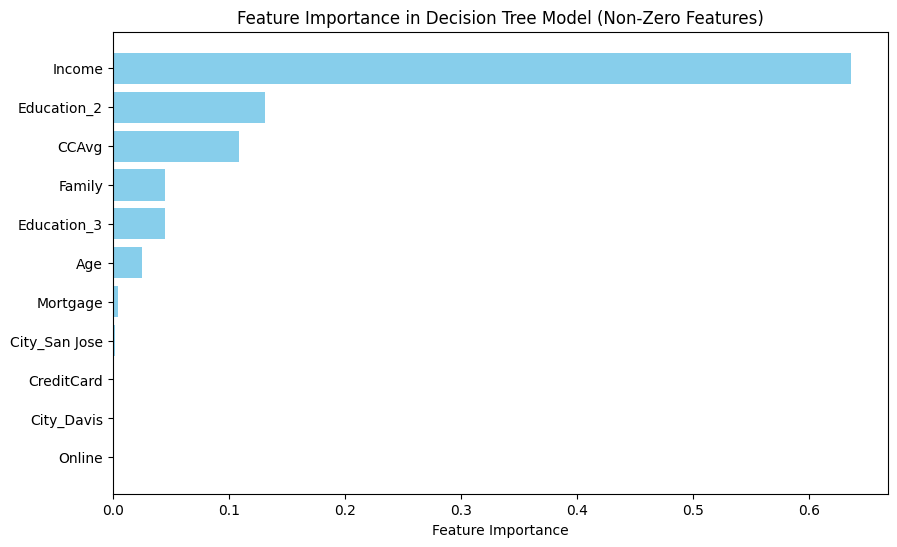

In [ ]:
# Get feature names from the training data (X_train)
feature_names = X_train.columns

# Create a DataFrame to hold feature names and their corresponding importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Filter out features with near-zero importance
non_zero_features = feature_importance_df[feature_importance_df['Importance'] > 1e-5]

# Plot horizontal bar plot for only important features
plt.figure(figsize=(10, 6))
plt.barh(non_zero_features['Feature'], non_zero_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree Model (Non-Zero Features)')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()


**Observation:** The model is strongly influenced by ***Income, Education Level 2 (Graduate), and CCAvg***, while features related to Family size, Age, and Mortgage play a smaller role. **You might consider focusing on Income and Education-related features for further analysis or marketing strategies.**

## Model Performance Comparison and Final Model Selection

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        e_metrics.T,
        e_metrics_2.T,
        e_metrics_4.T,
        e_metrics_3.T,
        e_metrics_5.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression (Baseline)",
    "Logistic Regression (Adjusted Threshold)",
    "Logistic Regression (Hyperparameter Tuning)",
    "Decision Tree (Baseline)",
    "Decision Tree (with Hyperparameter Tuning and Pruning)"
]
print(f"{bold}Test set performance comparison:{reset}")
models_test_comp_df

Test set performance comparison:


,Logistic Regression (Baseline),Logistic Regression (Adjusted Threshold),Logistic Regression (Hyperparameter Tuning),Decision Tree (Baseline),Decision Tree (with Hyperparameter Tuning and Pruning)
Accuracy,0.949597,0.950269,0.949597,0.971774,0.977151
Recall,0.583893,0.731544,0.577181,0.879195,0.899329
Precision,0.870000,0.762238,0.877551,0.845161,0.875817
F1,0.698795,0.746575,0.696356,0.861842,0.887417
AUC-ROC,0.787092,0.853076,0.784110,0.930635,0.942570


**Model Performance Comparision Summary**

* **Logistic Regression Models:**

  * The **baseline logistic regression model** provides good accuracy and precision, but it has a relatively low recall. This suggests that it is less effective at identifying all the true positives (customers who accept the loan).

  * After **adjusting the threshold, logistic regression** shows improved recall and a better F1 score, but with a slightly lower precision. This adjustment helps identify more true positives but at the cost of false positives.

  * **Hyperparameter tuning in logistic regression** leads to similar performance as the adjusted threshold model, maintaining high accuracy and recall, while precision is slightly lower.

* **Decission Tree Models:**

  * The **baseline decision tree model** has a high accuracy and recall, along with a balanced precision. The AUC-ROC is also high, indicating good model discrimination.

  * The **tuned decision tree** performs the best among all models, with the highest accuracy, recall, precision, F1 score, and AUC-ROC. This model is more balanced and generalizes well.



**Final Model Selection:**  Based on the performance comparison, the **Decision Tree (with Hyperparameter Tuning and Pruning)** should be selected as the final model for the project.

**Reason for Selection:**

* The tuned decision tree achieves the highest recall, meaning it identifies the most true positives (important for targeting potential loan customers).

* It also has the best precision, F1 score, and AUC-ROC, making it the most well-rounded model in terms of overall performance.

* Compared to the logistic regression models, the decision tree handles the balance between precision and recall better and provides a higher AUC-ROC, showing superior discrimination between classes.

## Actionable Insights and Business Recommendations


Based on the analysis, model evaluation, and performance comparison, here are some actionable insights and business recommendations for the bank to improve its Personal Loan Campaign:

**Target High Potential Customers:**

---

**Insight:** The Decision Tree (with Hyperparameter Tuning and Pruning) model performs well in terms of recall and precision, making it suitable for identifying customers who are more likely to accept the loan offer.

**Recommendation:**

* Segment high probability customers: Use the final decision tree model to identify customers with the highest probability of accepting a loan. These customers are more likely to respond positively to the loan offer, improving the campaign's conversion rate.

* Focus marketing efforts on customers with high income, graduate education, and high credit card spending as these are significant features influencing loan acceptance.


**Focus on Customers with Lower Risk:**

---

**Insight:** The model suggests that income is a significant predictor. Customers with higher income may not necessarily accept a loan (especially if they have other investment preferences or needs).

**Recommendation:**

* For higher-income customers, tailor the loan offer to provide more personalized incentives or rewards (such as lower interest rates, flexible repayment terms, or exclusive benefits) to increase the likelihood of them opting for the loan.

* Offer smaller loan amounts or shorter-term loans to customers with very high incomes as they might prefer smaller, more manageable amounts.

**Prioritize Segments with Low Recall but High Precision:**

---

**Insight:** The logistic regression (adjusted threshold) model offers a better recall and F1 score but at the cost of precision. This means it identifies more true positives but also includes more false positives.

**Recommendation:**

* Use the adjusted threshold model to identify customers who might be missed by other models but have a reasonable chance of converting if offered a loan. This approach can help capture more potential customers but requires more cautious targeting to avoid wasting resources on customers who won’t convert.

___

**Improve Marketing Campaigns with Custom Strategies:**

---

**Insight:** Certain features like Education Level (e.g., Graduate and Advanced/Professional) and Family Size are also strong predictors of loan acceptance. Recall improvement through model adjustments shows the bank's ability to target potential customers more effectively.

**Recommendation:**

* Tailor marketing messages for specific customer segments. For example, graduate or advanced education customers may prefer high-amount loans with premium terms, while those with larger families may prefer smaller, more manageable loans with more flexible terms.

* Leverage insights from feature importance (Income, Education 2 (graduate), CCAvg, Family, Education 3 (master/PG), Age etc.)  to design targeted campaigns for customers with certain income ranges, family sizes, or other characteristics.


**Optimize the Loan Offer Based on Customer Behavior:**

---

**Insight:** Features such as credit card spending (CCAvg), mortgage values, and online banking usage can provide a deeper understanding of the customer’s financial behavior and responsiveness.

**Recommendation:**

* ***Personalize loan offers based on credit card spending and mortgage values:*** Customers who spend more on credit cards may be more likely to take out a loan for additional financing. Similarly, those with mortgages may benefit from loan offers that focus on consolidating or refinancing.

* Use online banking customers as a focus group since they might be more comfortable with digital loan processes and may respond well to online-only loan offers.


**City-Specific Loan Products:**

---

**Insight:** Different cities and regions often have distinct financial behaviors. Customers in high-income cities may prefer larger loans for investments or high-value purchases, while customers in lower-income areas may be more inclined toward smaller, more manageable loan amounts..

**Recommendation:**

* Create location-based loan products. For example, offer higher-value loans in urban areas and smaller, short-term loans in rural areas or cities with lower financial capacity.

* Consider offering customized repayment terms tailored to the financial conditions of specific regions.


**Geo-targeted Marketing Campaigns:**

---

**Insight:** Different cities exhibit varying loan acceptance rates and customer characteristics. For example, urban centers might have higher-income individuals who are more likely to accept loans, while suburban or rural areas might show lower loan uptake but have unique needs.

**Recommendation:**

* Target urban areas with high-income customers by promoting premium loan products and online loan applications.

* Focus marketing efforts on suburban or rural regions with special offers, like lower interest rates, to increase loan uptake where it is currently low.


**Evaluate and Monitor Model Performance Continuously:**

---

**Insight:** The decision tree model with pruning has provided the best performance metrics, but market conditions and customer behavior change over time.

**Recommendation:**

* Monitor model performance continuously and retrain the model regularly with updated data to account for shifts in customer preferences, economic conditions, and trends.

* Set up periodic reviews of key metrics (like AUC-ROC, recall, and precision) to ensure the model continues to perform effectively as customer behavior evolves.

* Use cross-validation to test the model's robustness on different data splits and ensure that the model generalizes well to new, unseen customers.


**Handle Class Imbalance:**

---

**Insight:** While recall is high in some models, some segments might still be underrepresented or have imbalanced class distribution.

**Recommendation:**

* Adjust the decision threshold for loan approval in specific customer segments to ensure that potential customers are not missed due to class imbalance.


**Continuous Improvement with Ensemble Models:**

---

**Insight:** Decision trees are powerful, but they can be further enhanced by using ensemble models like Random Forest or Gradient Boosting.

**Recommendation:**

* Experiment with Random Forest or XGBoost to further improve predictive accuracy, reduce overfitting, and enhance model robustness, especially when there are complex relationships between features.

* Ensemble models may offer better generalization and accuracy, which can lead to a more consistent customer segmentation for loan offers.


#### **Conclusion**

---

In summary, the Decision Tree (with hyperparameter tuning and pruning) should be used to target high-potential customers for the Personal Loan Campaign. Meanwhile, models like Logistic Regression with adjusted thresholds can be utilized to capture more customers, although with a more focused approach. Marketing efforts should be tailored based on customer attributes such as income, education, and family size, along with their financial behavior including credit card usage and mortgages.